# CSCI 316 - Group Assignment 1

In [35]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# train - test split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Scale
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Load the Data

In [36]:
# define the given data set as df
df = pd.read_csv("train.csv", low_memory = False)
df_original = df.copy(deep=True)

# EDA

In [37]:
# output the original dataframe to the 5th row
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [38]:
# display summary of the dataframe
# check the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [39]:
# show the number of nulls of each columns
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [40]:
# (the Number of rows, the Number of columns)
df.shape

(100000, 28)

# Data Pre-processing

In [41]:
# Drop the irrelevant columns
df.drop(['ID', 'Name', 'SSN'], axis=1, inplace = True)

# Clean the text with special characters
def text_cleaning(data):
    if data is np.NaN or not isinstance(data,str):
        return data
    else:
        return str(data).strip(' _')
df = df.applymap(text_cleaning).replace(['#F%$D@*&8', '!@9#%8', ''], np.NaN)

# Convert Object to Numeric
df.Age = pd.to_numeric(df.Age, errors="coerce")
df.Num_of_Loan = pd.to_numeric(df.Num_of_Loan, errors="coerce")
df.Num_of_Delayed_Payment = pd.to_numeric(df.Num_of_Delayed_Payment, errors="coerce")
df.Annual_Income = pd.to_numeric(df.Annual_Income, errors="coerce")
df.Changed_Credit_Limit = pd.to_numeric(df.Changed_Credit_Limit, errors="coerce")
df.Outstanding_Debt = pd.to_numeric(df.Outstanding_Debt, errors="coerce")
df.Amount_invested_monthly = pd.to_numeric(df.Amount_invested_monthly, errors="coerce")
df.Monthly_Balance = pd.to_numeric(df.Monthly_Balance, errors="coerce")

# Credit_History_Age --> Credit_History_Month
def month_Calculate(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x
df.Credit_History_Age = df.Credit_History_Age.apply(lambda x: month_Calculate(x)).astype(np.float64)
df = df.rename(columns={'Credit_History_Age': 'Credit_History_Month'})

## Adjust the Range

In [42]:
# Drop the negative values
def drop_negative(df, col):
    filter = df[col] < 0
    df.loc[filter, col] = np.nan

drop_negative(df, "Age")
drop_negative(df, "Num_Bank_Accounts")
drop_negative(df,"Num_of_Loan")
drop_negative(df, "Delay_from_due_date")
drop_negative(df, "Num_of_Delayed_Payment")
drop_negative(df, "Monthly_Balance")

# <Adjust the Range>

# Annual_Income
# remove the outliers that the value_counts()==1

# Removing outliers with IQR deleted some important values.
filter = df["Annual_Income"] > 180000
df.loc[filter, "Annual_Income"] = np.nan

## Removing Outliers (IQR)

In [43]:
# Remove outliers of specific columns
for column in ['Age','Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries',
              'Total_EMI_per_month', 'Num_of_Delayed_Payment', 'Amount_invested_monthly']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        # outliers will be converted to nan
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan

## Encoding

In [44]:
# Label Encoding: Object -> Numeric
def label_encoding(data):
    le = LabelEncoder()
    data = le.fit_transform(data)
    encoded = dict(zip(le.classes_, le.transform(le.classes_)))
    return data, encoded

# Month
df.Month = pd.to_datetime(df.Month,format="%B").dt.month
df.Month = df.Month.astype(np.int64)

# Payment_of_Min_Amount
pay_min_map = {
    'No': 0,
    'NM': 1,
    'Yes': 2
}
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.replace(pay_min_map)

# Payment_Behaviour
behaviour_mapping = {
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}
df.Payment_Behaviour = df.Payment_Behaviour.replace(behaviour_mapping)

# Credit_Mix
mix_map={"Bad":0,"Standard":1, "Good":2}
df.Credit_Mix = df.Credit_Mix.replace(mix_map)

# Occupation
occupation_result, occupation_class = label_encoding(df.Occupation)
df.Occupation = occupation_result
df.Occupation = df.Occupation.replace(15, np.nan)

# Credit_Score
score_result, score_class = label_encoding(df.Credit_Score)
df.Credit_Score = score_result

# Customer_ID
cid_result, cid_class = label_encoding(df.Customer_ID)
df.Customer_ID = cid_result

# Type_of_Loan
loantype_result, loantype_class = label_encoding(df.Type_of_Loan)
df.Type_of_Loan = loantype_result

## **Handling Missing values**

### Models for predicting Missing values

In [45]:
# Regression (predicting continuous vars)

def knn_regression_accuracy(df, ind_cols, target, r, k):
    
    X = df[ind_cols]
    y = df[[target]]

    # split train set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r, test_size = 0.2)

    # KNN
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    # The closer MSE is to zero, the more accurate the prediction is.
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    
    # The closer the coefficient of determination is to 1, the better the model describes the data
    # This means that approximately n% of the total variation can be accounted for.
    print("R-squared:", r2_score(y_test, y_pred))
    print("score:", knn.score(X_test, y_test))
    
    
# this function returns the graph explaining fluctuation of MSE value according to K value    
def k_mse_graph (df, ind_cols, target, r, n):
    
    mse_values = []
    X = df[ind_cols]
    y = df[[target]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r, test_size = 0.2)
    
    for i in range(1,n+1):
        knn = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
        y_pred_i = knn.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred_i))
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), mse_values, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
    plt.title("Mean Squared Error vs. K Value (%s - %s)" %(ind_cols,target))
    plt.xlabel("K Value")
    plt.ylabel("Mean Squared Error")
        
    return plt.show()
        
# Function applied to the given dataframe 
def knn_regression_impute(df, ind_cols, target, k):
    # Select the rows you want to fill in missing value
    df_target_missing= df[df[target].isna()]
    
    # Choose rows with no missing value (used as training data)
    df_train = df.dropna(subset=target)
    
    X_train = df_train[ind_cols]
    y_train = df_train[[target]]

    # KNN
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    X_missing = df_target_missing[ind_cols]
    y_pred = knn.predict(X_missing)
    
    # fill the missing value with y_pred (predicted value)
    df.loc[df[target].isna(), target] = y_pred

    
def linear_regression_accuracy(df, ind_cols, target, r):
        
    X = df[ind_cols]
    y = df[[target]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r, test_size = 0.2)

    linear = LinearRegression().fit(X_train, y_train)

    y_pred = linear.predict(X_test)
    
    plt.scatter(y_test, y_pred, alpha = 0.4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    #return linear.score(X_test, y_test)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print("score:", linear.score(X_test, y_test))
    print(plt.show())
    

def knn_classification_accuracy(df, ind_cols, target, r, k):

    X = df[ind_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r, test_size = 0.2)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    y_pred = knn.predict(X_test)
        
    score = accuracy_score(y_test, y_pred)
    
    # Can print the classfication report out if you want
    report = classification_report(y_test, y_pred)
    
    matrix = confusion_matrix(y_test, y_pred)
    
    print("accuracy: ", score)
    print("Confusion Matrix: \n", matrix)
    

def k_score_graph (df, ind_cols, target, r, n):
    score_values = []
    X = df[ind_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r, test_size = 0.2)
    
    for i in range(1,n+1):
        knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
        y_pred_i = knn.predict(X_test)
        score_values.append(accuracy_score(y_test, y_pred_i))
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), score_values, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
    plt.title("Accuracy score vs. K Value (%s - %s)" %(ind_cols,target))
    plt.xlabel("K Value")
    plt.ylabel("Accuracy Score")
        
    return plt.show()

def knn_classifier_impute(df, ind_cols, target, k):
    # Select the rows you want to fill in missing value
    df_target_missing= df[df[target].isna()]
    
    # Choose rows with no missing value (used as training data)
    df_train = df.dropna(subset=target)
    
    X_train = df_train[ind_cols]
    y_train = df_train[target]

    # KNN
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    X_missing = df_target_missing[ind_cols]
    y_pred = knn.predict(X_missing)
    
    # fill the missing value with y_pred (predicted value)
    df.loc[df[target].isna(), target] = y_pred

## Why scaling was not performed before filling missing values with KNN

### Of course, we understand that scaling can play a crucial role in KNN since it involves distance calculations.
### In our data preprocessing steps, there is a process to fill missing values for monthly balance and amount invested monthly using KNN. In the resulting dataset, when missing values were filled with negative values, we performed a task to change them to 0 (as these columns cannot have negative values). After scaling, it became challenging to carry out this task.
### Additionally, the actual predicting scores were very similar when filling missing values after scaling and not scaling.

### For these reasons, we skipped scaling before filling missing values.

## Handle the missing values considering relationship among the columns.
#### The reason why I didn't adopt the mean-medain imputer is that the newly created data cause the strong bias.
#### To avoid the bias, I used the knn algorithm (regressor & classifier).


### **In general, data shows a pattern according to Customer_ID.**

****IMPORTANT:
K value is preferred to be odd number to ensure that there are no ties in the voting.
Also, k=1 is rarely used due to overfitting.**

* the accuary is higher when the mse value is lower
* MSE = mean of {(actual value) - (predicted value)}^2 

## Age
##### It is the process of determining how well the independent variable predicts the column and at which number of neighbors it has the lowest error.

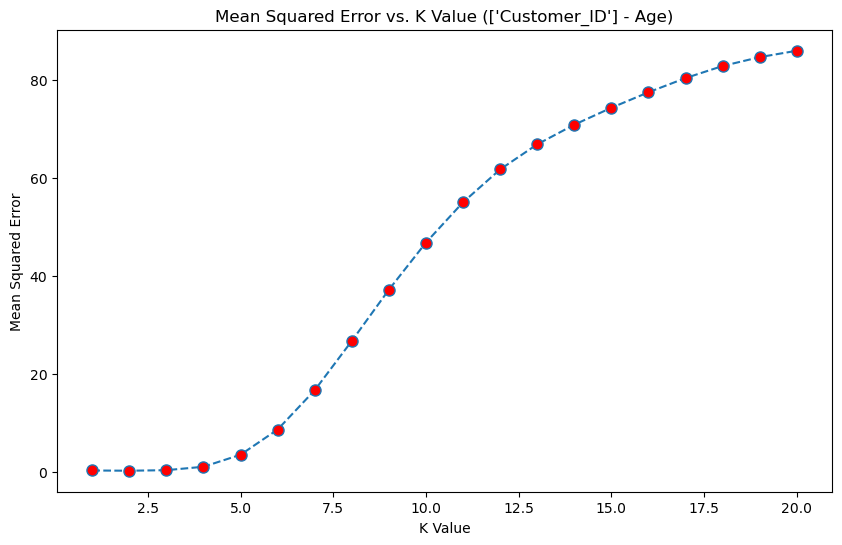

In [46]:
df_without_ms = df.dropna(subset = "Age")

k_mse_graph (df_without_ms, ["Customer_ID"], "Age", 10, 20)

In [47]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Age", 10, 3)

Mean Squared Error: 0.3152472056504148
R-squared: 0.9972630401750907
score: 0.9972630401750907


##### For the rest of the columns, the process of finding the most appropriate k value is attached to the appendix because it is the same as the above process.
##### Below is the code that fills the actual missing value.

In [48]:
knn_regression_impute(df, ["Customer_ID"], "Age", 3)
knn_regression_impute(df, ["Customer_ID"], "Occupation", 3)
knn_regression_impute(df, ["Customer_ID"], "Annual_Income", 1)
knn_regression_impute(df, ["Annual_Income"], "Monthly_Inhand_Salary", 3)
knn_regression_impute(df, ["Customer_ID"], "Num_Bank_Accounts", 3)
knn_regression_impute(df, ["Customer_ID"], "Num_Credit_Card", 3)
knn_regression_impute(df, ["Customer_ID"], "Interest_Rate", 3)
knn_regression_impute(df, ["Customer_ID"], "Num_of_Loan", 3)
knn_regression_impute(df, ["Customer_ID"], "Num_of_Delayed_Payment", 3)
knn_regression_impute(df, ["Customer_ID"], "Delay_from_due_date", 3)
knn_regression_impute(df, ["Customer_ID"], "Credit_History_Month", 3)
knn_regression_impute(df, ["Customer_ID","Interest_Rate","Credit_History_Month", "Num_of_Loan"], "Num_Credit_Inquiries", 3)
knn_classifier_impute(df, ["Customer_ID", "Type_of_Loan"], "Credit_Mix", 3)
knn_regression_impute(df, ["Customer_ID", "Num_Bank_Accounts"], "Changed_Credit_Limit", 3)
knn_regression_impute(df, ["Customer_ID"], "Total_EMI_per_month", 3)

### Amount_invested_monthly / Monthly_Balance

##### The two columns are related columns. However, both have missing values at the same time, making it difficult to be independent variables for each other.
##### Therefore, let's divide the parts where the former and the latter columns each have missing values to reduce the number of missing values and then fill in the remaining missing values with mean or median values.



### Monthly_Balance 

Mean Squared Error: 2037.517388491763
R-squared: 0.9557917786182669
score: 0.9557917786182669


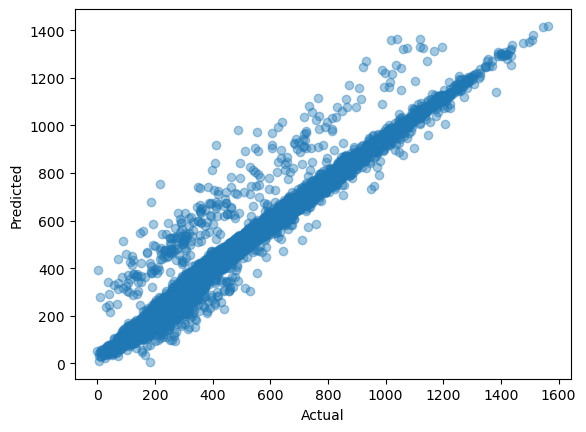

None


In [49]:
# Choose only rows with no missing values in both columns.
filter = (df['Amount_invested_monthly'].isna() == False) & (df['Monthly_Balance'].isna() == False)

df_drop_ms_simul = df.loc[filter, :]

# Now we can predict Monthly_Balance using Amount_invested_monthly
case = df.drop(["Payment_Behaviour","Monthly_Balance", "Credit_Score","Changed_Credit_Limit"],axis=1).columns
linear_regression_accuracy(df_drop_ms_simul, case, "Monthly_Balance", 10)

In [50]:
## linear Regression

# Train (rows with no missing values in both columns.)
filter = (df['Amount_invested_monthly'].isna() == False) & (df['Monthly_Balance'].isna() == False)

both_no_ms = df.loc[filter, :]

X_train = both_no_ms[both_no_ms.drop(["Payment_Behaviour","Credit_Score","Monthly_Balance", "Changed_Credit_Limit"],axis=1).columns]
y_train = both_no_ms[["Monthly_Balance"]]

linear = LinearRegression().fit(X_train, y_train)

# Test: part where amount invested monthly doesn't have missing values and monthly balance has missing values.
# Because Amount_invested_monthly will be used to predict Monthly_Balance.
part_to_predict = (df['Amount_invested_monthly'].isna() == False) & (df['Monthly_Balance'].isna() == True)
target_has_ms = df.loc[part_to_predict, :]
target_has_ms.shape
case = target_has_ms[target_has_ms.drop(["Payment_Behaviour","Credit_Score","Monthly_Balance","Changed_Credit_Limit"],axis=1).columns]

y_pred = linear.predict(case)
df.loc[part_to_predict, "Monthly_Balance"] = y_pred

# Monthly_Balance cannot be negative, so only negative values are changed to zero.
filter = df.Monthly_Balance < 0
df.loc[filter, "Monthly_Balance"] = 0

### Amount_invested_monthly

Mean Squared Error: 1990.4941071249564
R-squared: 0.8514591414946704
score: 0.8514591414946704


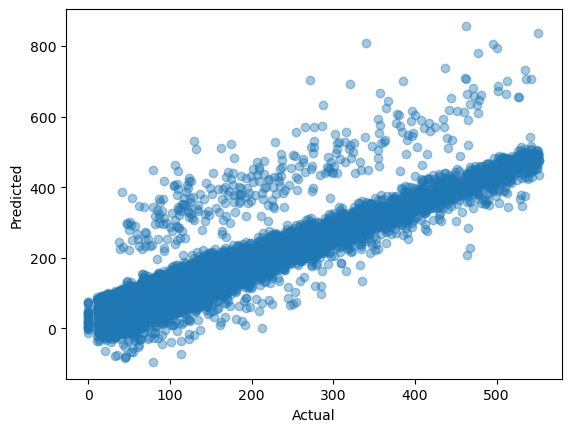

None


In [51]:
# Choose only rows with no missing values in both columns.
filter = (df['Amount_invested_monthly'].isna() == False) & (df['Monthly_Balance'].isna() == False)

df_drop_ms_simul = df.loc[filter, :]

# Now we can predict Amount_invested_monthly using Monthly_Balance
case = df.drop(["Payment_Behaviour","Amount_invested_monthly", "Credit_Score"],axis=1).columns
linear_regression_accuracy(df_drop_ms_simul, case, "Amount_invested_monthly", 10)

In [52]:
# Train (rows with no missing values in both columns.)
filter = (df['Amount_invested_monthly'].isna() == False) & (df['Monthly_Balance'].isna() == False)

both_no_ms = df.loc[filter, :]

X_train = both_no_ms[both_no_ms.drop(["Payment_Behaviour","Credit_Score","Amount_invested_monthly"],axis=1).columns]
y_train = both_no_ms[["Amount_invested_monthly"]]
    
linear = LinearRegression().fit(X_train, y_train)

# Test: part where monthly balance doesn't have missing values and amount_invested_monthly has missing values.
# Because Monthly_Balance will be used to predict Amount_invested_monthly.
part_to_predict = (df['Amount_invested_monthly'].isna() == True) & (df['Monthly_Balance'].isna() == False)
target_has_ms = df.loc[part_to_predict, :]
target_has_ms.shape
case = target_has_ms[target_has_ms.drop(["Payment_Behaviour","Credit_Score","Amount_invested_monthly"],axis=1).columns]

y_pred = linear.predict(case)
df.loc[part_to_predict, "Amount_invested_monthly"] = y_pred

# Amount_Invested_Monthly cannot be negative, so only negative values are changed to zero.
filter = df.Amount_invested_monthly < 0
df.loc[filter, "Amount_invested_monthly"] = 0

In [53]:
# The remaining 1013 are relatively trivial, so let's fill them with simple imputer.
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_mode = SimpleImputer(strategy = 'most_frequent')

df.Monthly_Balance = imputer_mean.fit_transform(df[["Monthly_Balance"]])
df.Amount_invested_monthly = imputer_mean.fit_transform(df[["Amount_invested_monthly"]])

# filling missing values of Payment_Behaviour
df.Payment_Behaviour = imputer_mode.fit_transform(df[["Payment_Behaviour"]])

### Convert the data type:

###### if the data type is int, the column is categorical.
###### if the data type is float, the column is continuous.

In [54]:
df.Occupation = df.Occupation.astype(int)
df.Credit_Mix = df.Credit_Mix.astype(int)
df.Payment_Behaviour = df.Payment_Behaviour.astype(int)

# Visualizing Data

ID is not displayed due to high cardinality
Customer_ID is not displayed due to high cardinality
Name is not displayed due to high cardinality
Age is not displayed due to high cardinality
SSN is not displayed due to high cardinality
Annual_Income is not displayed due to high cardinality
Num_of_Loan is not displayed due to high cardinality
Type_of_Loan is not displayed due to high cardinality
Num_of_Delayed_Payment is not displayed due to high cardinality
Changed_Credit_Limit is not displayed due to high cardinality
Outstanding_Debt is not displayed due to high cardinality
Credit_History_Age is not displayed due to high cardinality
Amount_invested_monthly is not displayed due to high cardinality
Monthly_Balance is not displayed due to high cardinality


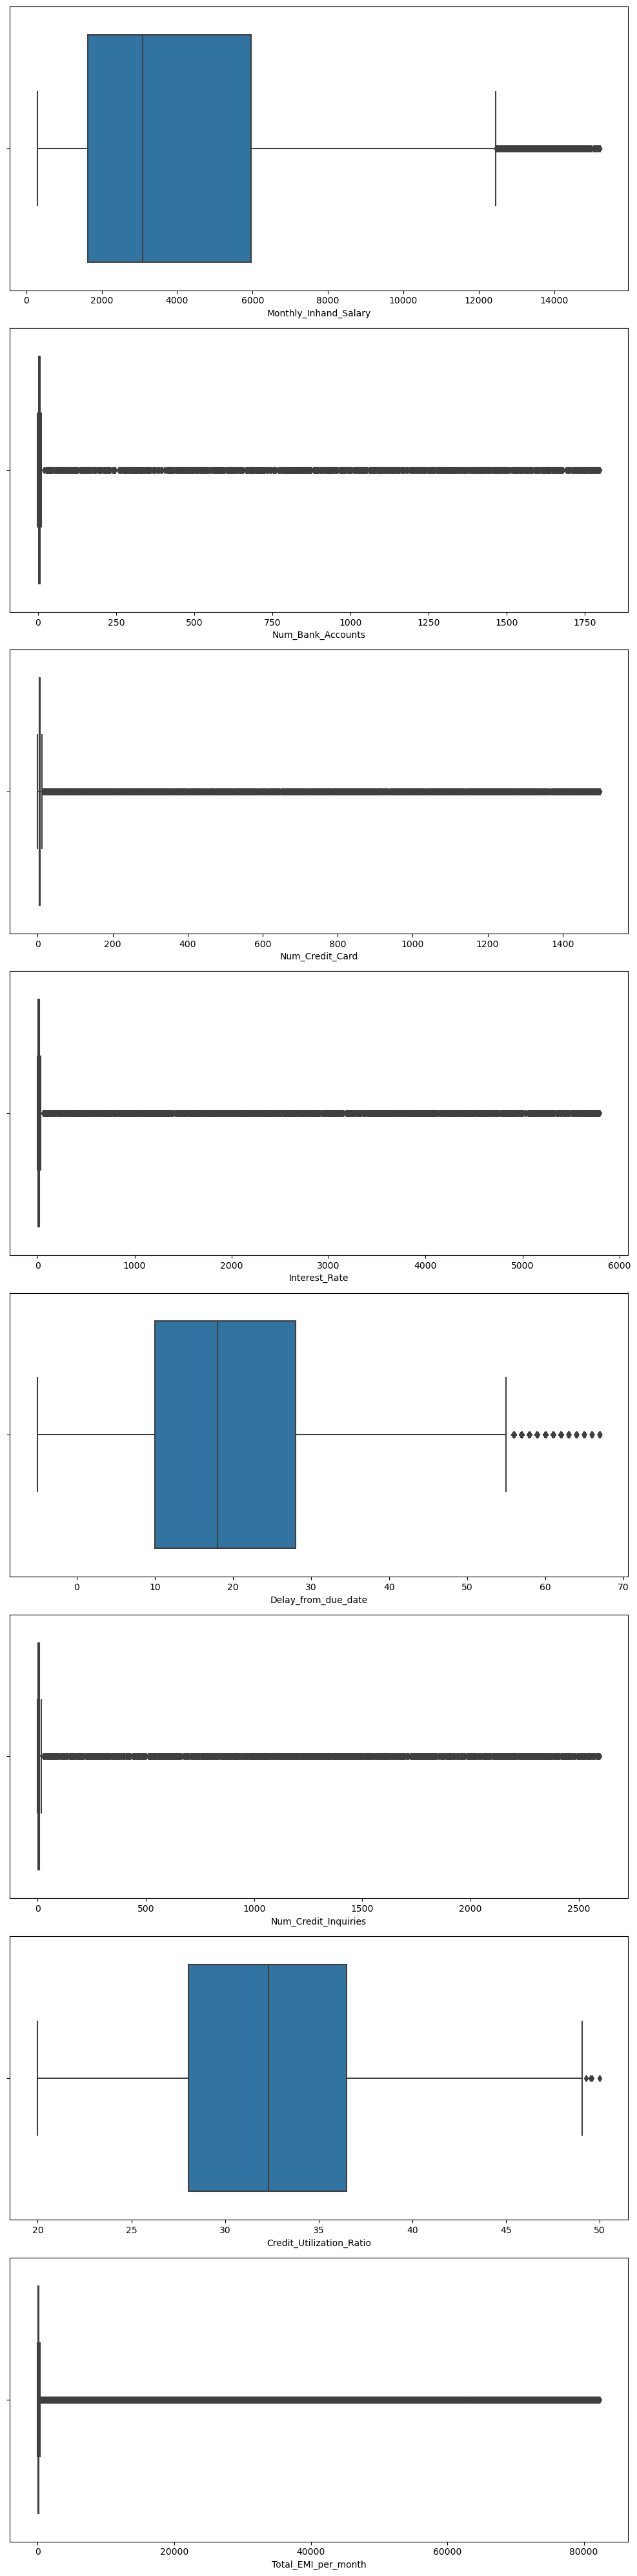

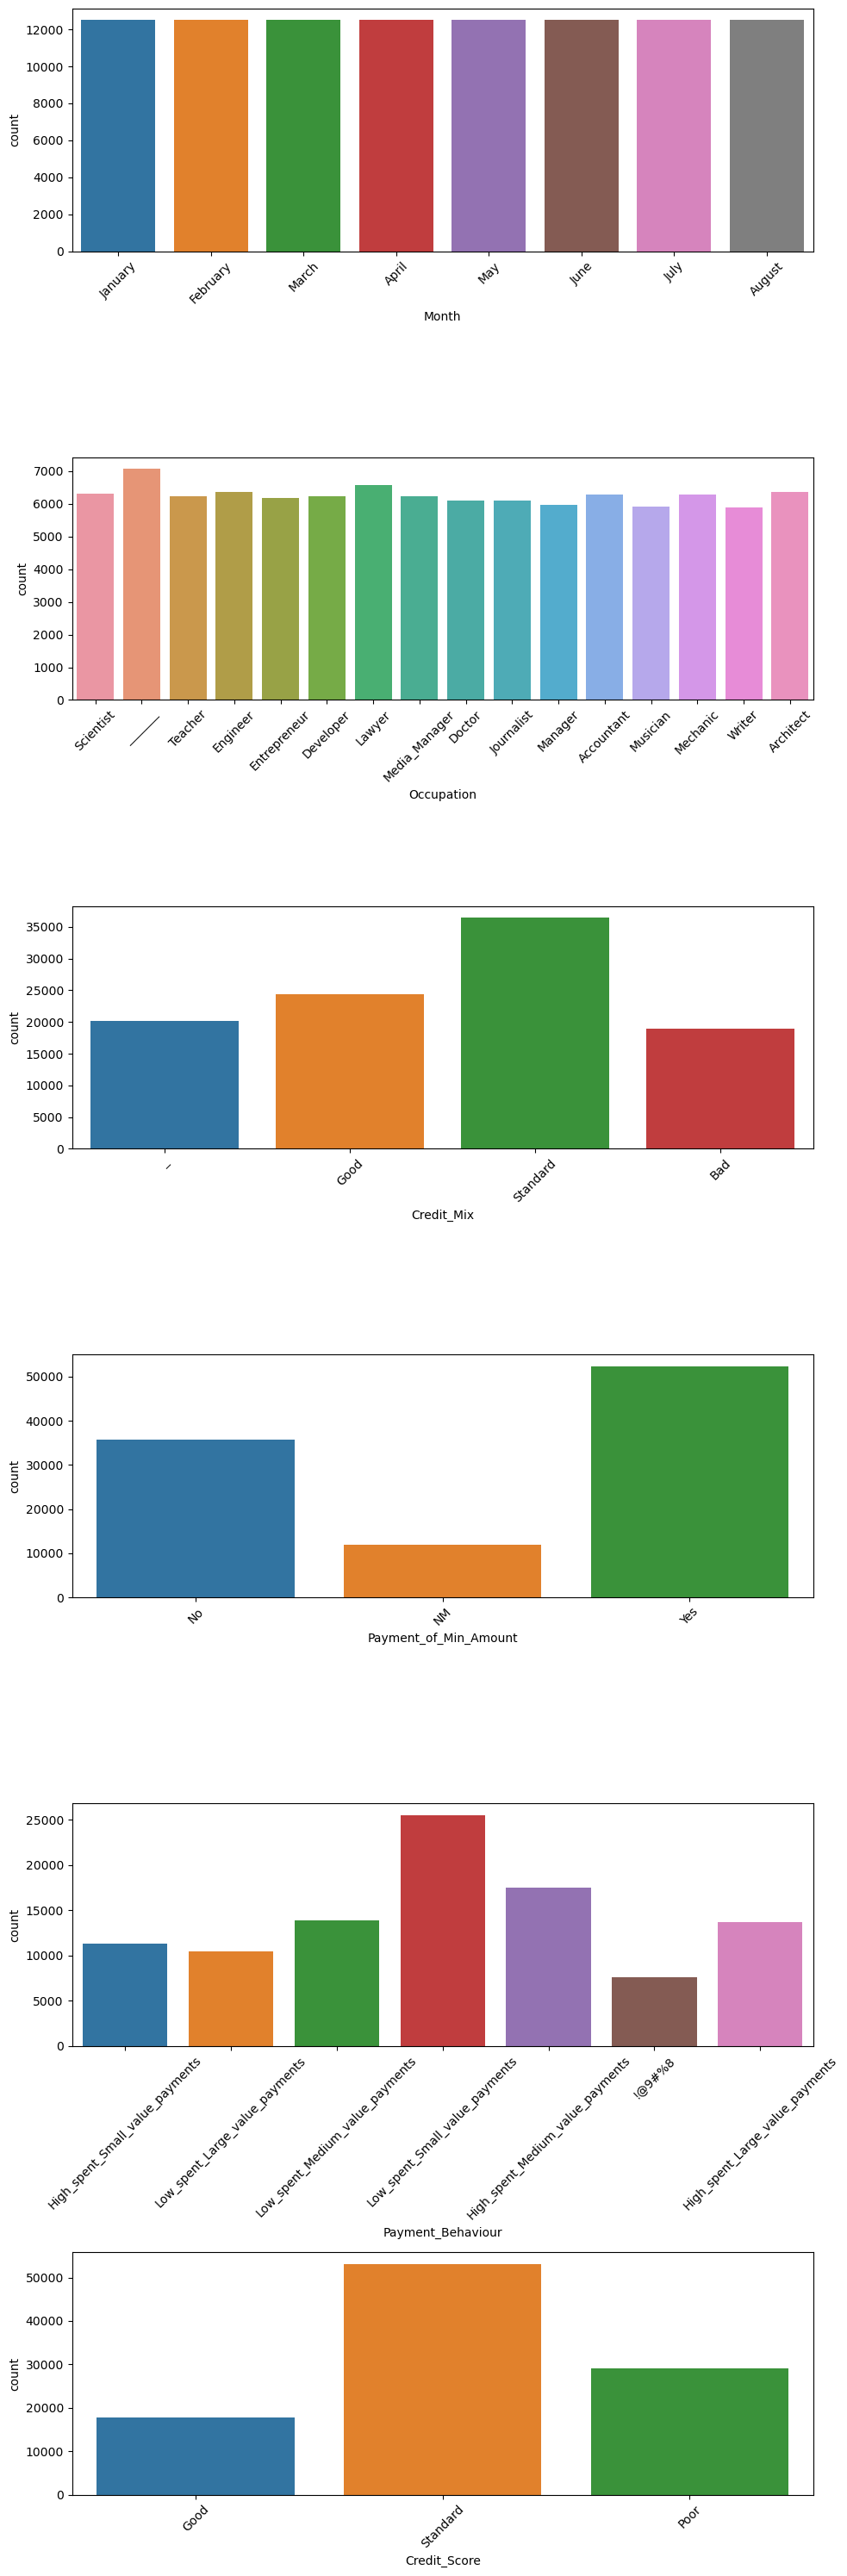

In [55]:
# Identifying numerical and categorical columns
numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_original.select_dtypes(include=['object']).columns

# Separate columns with high number of unique values or high cardinality
high_cardinality = [col for col in categorical_cols if df_original[col].nunique() >= 20]

# Remove columns with high cardinality from categorical columns (like ID, Customer_ID)
categorical_cols = [col for col in categorical_cols if df_original[col].nunique() < 20]

# Function to create box plot for each numerical column
def plot_numerical_columns(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols))
    if num_cols == 1:
        axes = [axes]
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
    plt.tight_layout()

# Function to create bar chart for each categorical column
def plot_categorical_columns(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols))
    if num_cols == 1:
        axes = [axes]
    for i, col in enumerate(columns):
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    
# Display list of undisplayed columns
for col in high_cardinality:
    print(f"{col} is not displayed due to high cardinality")

# Plotting numerical columns
plot_numerical_columns(df_original, numerical_cols)

# Plotting categorical columns
plot_categorical_columns(df_original, categorical_cols)

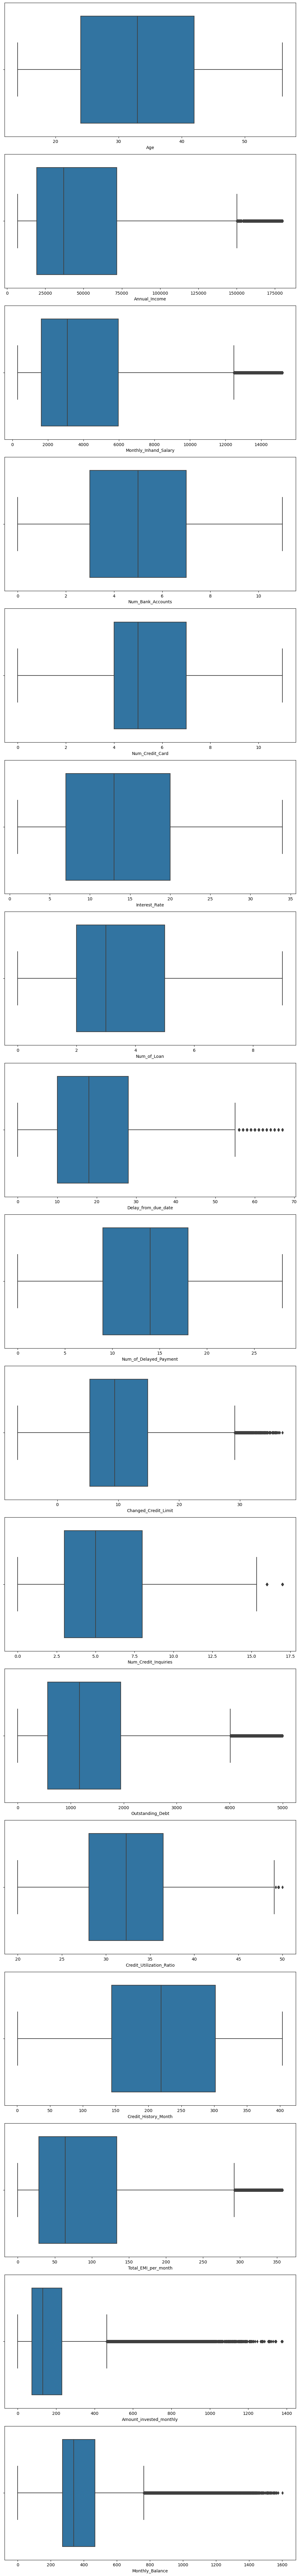

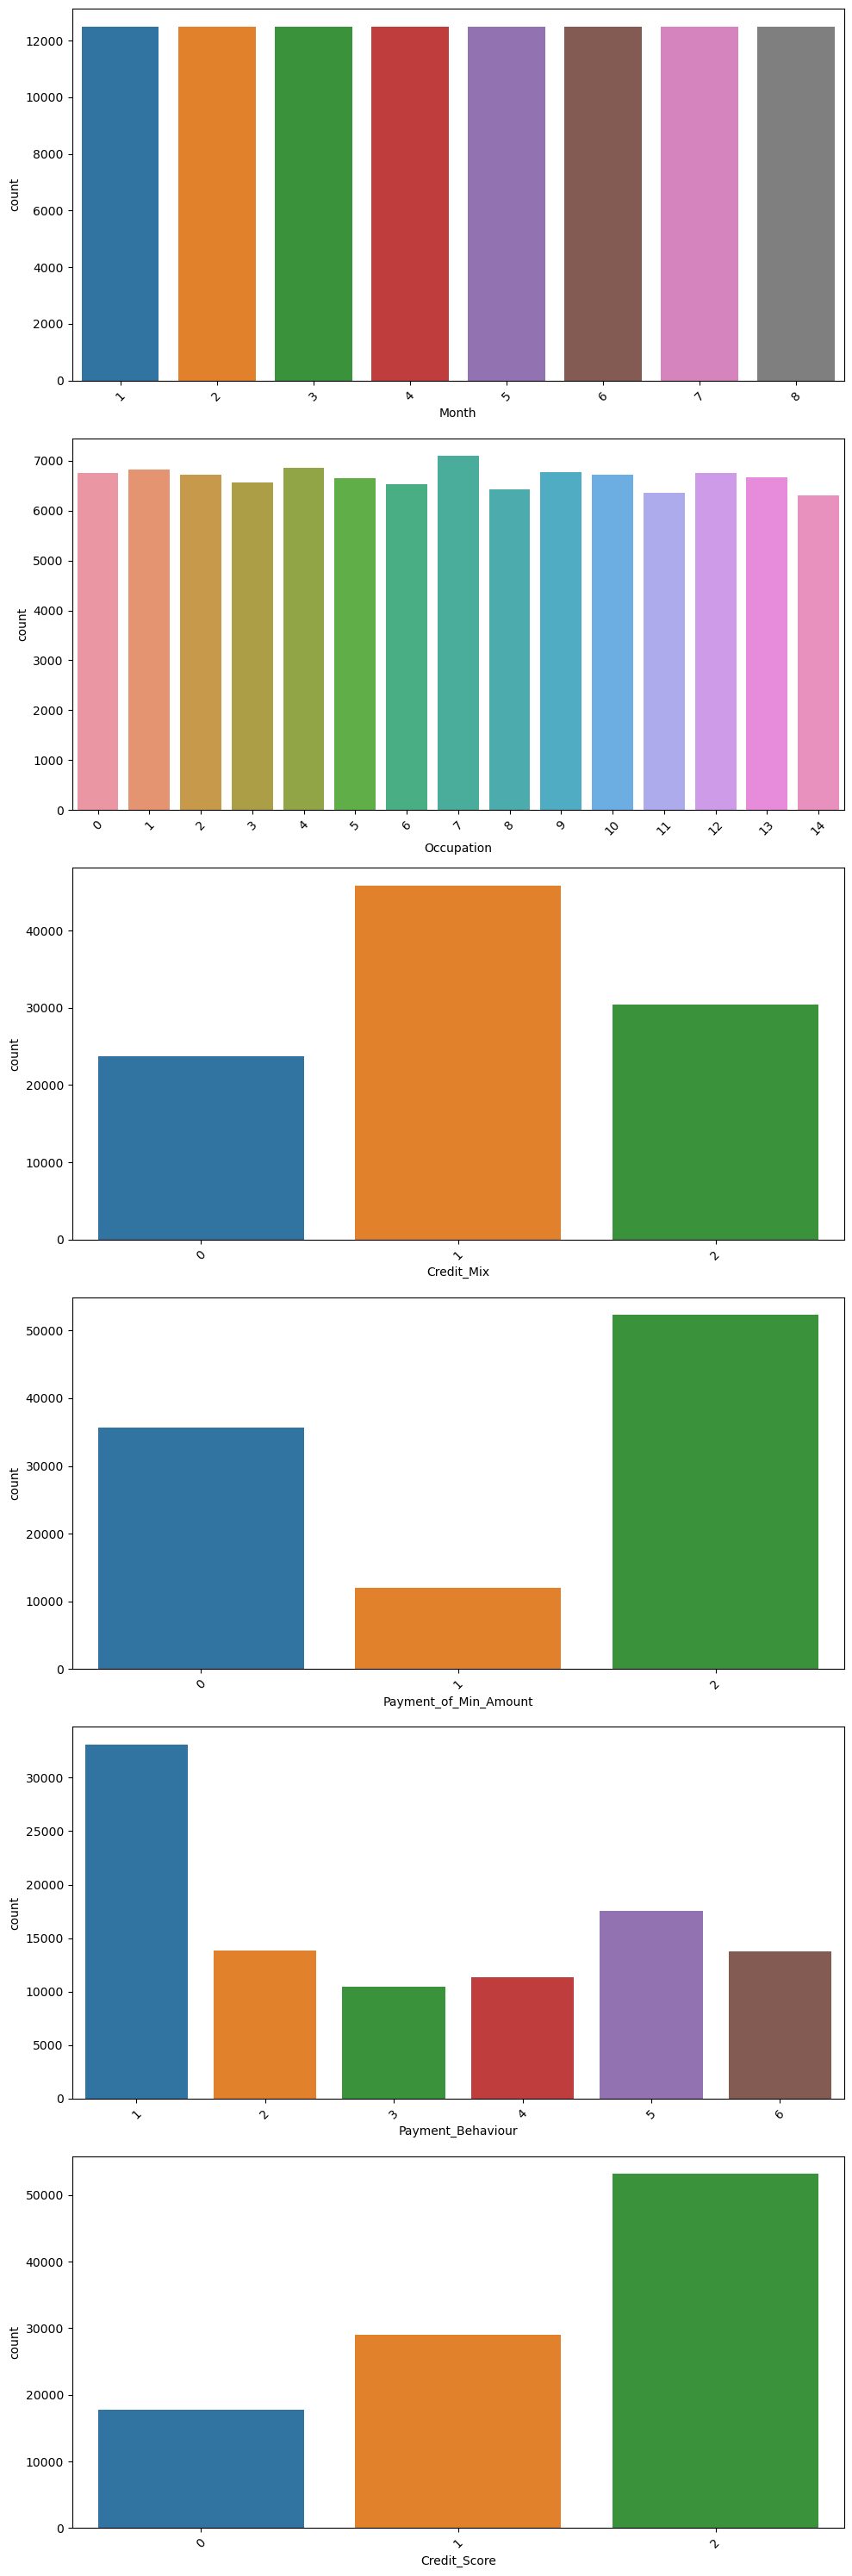

In [56]:
# Identifying numerical and categorical columns
transformed_categorical_cols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Update the numerical and categorical columns lists
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                  if col not in transformed_categorical_cols]
categorical_cols = transformed_categorical_cols

# Plotting
plot_numerical_columns(df, numerical_cols)
plot_categorical_columns(df, categorical_cols)

In [57]:
score_class

{'Good': 0, 'Poor': 1, 'Standard': 2}

##### The case where outliers remain in the box plot graph is because it was not removed under the assumption that it was necessary due to the characteristics of the column.

## Correlation Matrix

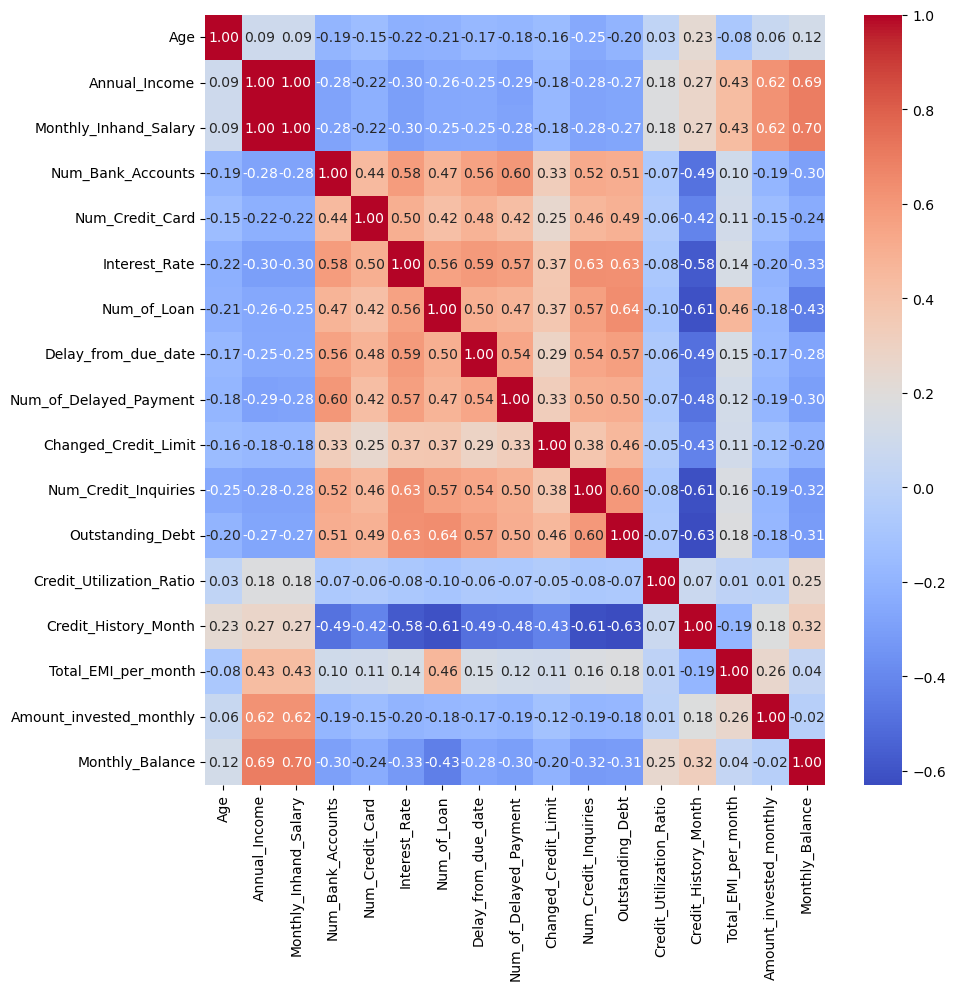

In [23]:
df_mat = df.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix',
              'Occupation', 'Credit_Score', 'Type_of_Loan'], axis=1)
plt.figure(figsize=[10,10])
sns.heatmap(df_mat.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# **Predict CREDIT_SCORE**

## 3 Models and User Defined Transformer

##### The transformer defines a total of three new features with existing columns.
##### It is determined whether or not they will be used through the parameters of the transformer in the feature selection stage.
##### New Features: Financial_Stability, Loan_Replacement_Capacity, Income_To_Debt_Ratio

In [58]:
# Adding User-Defined Features

class FinancialIndicatorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, include_financial_stability=True, 
                 include_loan_replacement_capacity_ratio=True, 
                 include_income_to_debt_ratio=True):
        
        self.monthly_balance_col = 'Monthly_Balance'
        self.monthly_inhand_salary_col = 'Monthly_Inhand_Salary'
        self.total_EMI_per_month_col = 'Total_EMI_per_month'
        self.annual_income_col = 'Annual_Income'
        self.outstanding_debt_col = 'Outstanding_Debt'

        self.include_financial_stability = include_financial_stability
        self.include_loan_replacement_capacity_ratio = include_loan_replacement_capacity_ratio
        self.include_income_to_debt_ratio = include_income_to_debt_ratio
        

    # The fit method of the transformer simply returns self as it does not require training on the training data.
    # The actual transformation tasks are performed in the transform method.
    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):

        # Find index of columns
        monthly_balance_ix = np.where(x.columns == self.monthly_balance_col)[0][0]
        monthly_inhand_salary_ix = np.where(x.columns == self.monthly_inhand_salary_col)[0][0]
        total_EMI_per_month_ix = np.where(x.columns == self.total_EMI_per_month_col)[0][0]
        annual_income_ix = np.where(x.columns == self.annual_income_col)[0][0]
        outstanding_debt_ix = np.where(x.columns == self.outstanding_debt_col)[0][0]

        epsilon = 1e-4
        # Calculate the Financial Stability Score
        financial_stability = x.iloc[:, monthly_inhand_salary_ix] / (x.iloc[:, monthly_balance_ix] + epsilon) 
        # Calculate the Loan Replacement Capacity
        loan_replacement_capacity = x.iloc[:, total_EMI_per_month_ix] / (x.iloc[:, monthly_inhand_salary_ix])
        # Small value to prevent division by zero
        # Calculate the Income To Debt Ratio, with an offset for zero debt
        income_to_debt_ratio = x.iloc[:, annual_income_ix] / (x.iloc[:, outstanding_debt_ix] + epsilon)

        x_transformed = x.copy()

        # Add the new defined columns to the DataFrame
        if self.include_financial_stability:
            x_transformed.loc[:, 'Financial_Stability'] = financial_stability
            self.include_financial_stability = False

        if self.include_loan_replacement_capacity_ratio:
            x_transformed.loc[:, 'Loan_Replacement_Capacity'] = loan_replacement_capacity
            self.include_loan_replacement_capacity_ratio = False

        if self.include_income_to_debt_ratio:
            x_transformed.loc[:, 'Income_To_Debt_Ratio'] = income_to_debt_ratio
            self.include_income_to_debt_ratio = False


        return x_transformed # Return tranformed dataframe

## Preparing the case without adding the new features
#### only use the initially given features.

### Define X input and target before adding new features

In [59]:
# Feature Selection:
selected_features = df.drop(["Credit_Score"], axis=1).columns

#Selected features does not include Credit_Score
x_bef_transformed = df[selected_features]
# y is always fixed
y = df['Credit_Score']

# y denotes the target variable or label that the model is intended to predict.
# For this purpose, the selected features are present in X_before_transformed.


#scaler: MinMax or Standard
scaler = MinMaxScaler()

# Scale the continuous variables to a normalized range from 0 - 1
continuous_cols = df.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix',
              'Occupation', 'Credit_Score', 'Type_of_Loan'],axis=1).columns
categorical_cols = ['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix',
              'Occupation', 'Type_of_Loan']

x_bef_transformed[continuous_cols] = scaler.fit_transform(x_bef_transformed[continuous_cols])


# Sampling
def StratifiedSampling(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)
    return x_train, x_test, y_train, y_test

before_x_train, before_x_test, before_y_train, before_y_test = StratifiedSampling(x_bef_transformed, y)


## KNN
### : not adding new feature

In [60]:
# parameter k(n_neighbors) and weight
def knn(ind_cols, k, weight):
    x_train, x_test, y_train,y_test = StratifiedSampling(ind_cols, y)
    x_train = np.ascontiguousarray(x_train)
    y_train = np.ascontiguousarray(y_train)
    x_test = np.ascontiguousarray(x_test)
    y_test = np.ascontiguousarray(y_test)
    
    knn = KNeighborsClassifier(n_neighbors = k, weights = weight)
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(metrics.precision_score(y_test, y_pred, average='weighted') * 100, 2)
    recall = round(metrics.recall_score(y_test, y_pred, average='weighted')* 100, 2)
    
    return y_test, y_pred, accuracy, precision, recall

In [61]:
# default value of weight is uniform
y_test_knn, y_pred_knn_basic, knn_basic_accuracy, knn_basic_precision, knn_basic_recall = knn(x_bef_transformed, 5, 'uniform')

print("Accuracy of KNN is:", knn_basic_accuracy)
print("Precision of KNN is:", knn_basic_precision)
print("Recall of KNN is:", knn_basic_recall)

Accuracy of KNN is: 80.4
Precision of KNN is: 80.65
Recall of KNN is: 80.4


## By adding new features one by one to existing independent variables, we examine which features affect target prediction.

In [62]:
# Append Financial_Stability

selected_features_added = list(selected_features)

selected_features_added.append('Financial_Stability')

transformer = FinancialIndicatorTransformer(include_financial_stability=True,
                                           include_loan_replacement_capacity_ratio = False,
                                           include_income_to_debt_ratio = False)

df_added = transformer.transform(df)
x_transformed = df_added[selected_features_added]

x_continuous = x_transformed.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation',
                                   'Type_of_Loan'],axis=1).columns
x_categorical = ['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Type_of_Loan']

# Scaling
x_transformed[x_continuous] = scaler.fit_transform(x_transformed[x_continuous])

# Sampling
after_x_train, after_x_test, after_y_train, after_y_test = StratifiedSampling(x_transformed, y)



y_test_knn, y_pred_knn_f1, knn_f1_accuracy, knn_f1_precision, knn_f1_recall = knn(x_transformed, 5, 'uniform')

print("Accuracy of KNN is:", knn_f1_accuracy)
print("Precision of KNN is:", knn_f1_precision)
print("Recall of KNN is:", knn_f1_recall)

Accuracy of KNN is: 80.4
Precision of KNN is: 80.65
Recall of KNN is: 80.4


In [63]:
# Append Loan_Replacement_Capacity

selected_features_added = list(selected_features)

selected_features_added.append('Loan_Replacement_Capacity')

transformer = FinancialIndicatorTransformer(include_financial_stability=False,
                                           include_loan_replacement_capacity_ratio = True,
                                           include_income_to_debt_ratio = False)

df_added = transformer.transform(df)
x_transformed = df_added[selected_features_added]

x_continuous = x_transformed.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation',
                                   'Type_of_Loan'],axis=1).columns
x_categorical = ['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Type_of_Loan']

# Scaling
x_transformed[x_continuous] = scaler.fit_transform(x_transformed[x_continuous])

# Sampling
after_x_train, after_x_test, after_y_train, after_y_test = StratifiedSampling(x_transformed, y)

y_test_knn, y_pred_knn_f2, knn_f2_accuracy, knn_f2_precision, knn_f2_recall = knn(x_transformed, 5, 'uniform')

print("Accuracy of KNN is:", knn_f2_accuracy)
print("Precision of KNN is:", knn_f2_precision)
print("Recall of KNN is:", knn_f2_recall)

Accuracy of KNN is: 80.4
Precision of KNN is: 80.65
Recall of KNN is: 80.4


In [64]:
# Append Income_To_Debt_Ratio

selected_features_added = list(selected_features)

selected_features_added.append('Income_To_Debt_Ratio')

transformer = FinancialIndicatorTransformer(include_financial_stability=False,
                                           include_loan_replacement_capacity_ratio = False,
                                           include_income_to_debt_ratio = True)

df_added = transformer.transform(df)
x_transformed = df_added[selected_features_added]

x_continuous = x_transformed.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation',
                                   'Type_of_Loan'],axis=1).columns
x_categorical = ['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Type_of_Loan']

# Scaling
x_transformed[x_continuous] = scaler.fit_transform(x_transformed[x_continuous])

# Sampling
after_x_train, after_x_test, after_y_train, after_y_test = StratifiedSampling(x_transformed, y)

y_test_knn, y_pred_knn_f3, knn_f3_accuracy, knn_f3_precision, knn_f3_recall = knn(x_transformed, 5, 'uniform')

print("Accuracy of KNN is:", knn_f3_accuracy)
print("Precision of KNN is:", knn_f3_precision)
print("Recall of KNN is:", knn_f3_recall)

Accuracy of KNN is: 80.4
Precision of KNN is: 80.65
Recall of KNN is: 80.4


##### As a result, no difference from the existing accuracy was found between any feature added.
##### Expected Reason: Newly created features may already be sufficiently included in the dataset's existing features. In such cases, introducing additional features with similar information may not significantly enhance the model's performance.


##### Therefore, it does not appear to be important adding new features in obtaining higher accuracy.
##### In this case, we will try to find the highest accuracy after adding all the features.

##### (For the case of no new features are added, the hyperparameter tuning process will be added to the apendix.)

### KNN: After adding new features

In [65]:
selected_features_added = list(selected_features)

selected_features_added.append('Financial_Stability')
selected_features_added.append('Loan_Replacement_Capacity')
selected_features_added.append('Income_To_Debt_Ratio')

transformer = FinancialIndicatorTransformer(include_financial_stability=True,
                                           include_loan_replacement_capacity_ratio = True,
                                           include_income_to_debt_ratio = True)

df_added = transformer.transform(df)
x_transformed = df_added[selected_features_added]

x_continuous = x_transformed.drop(['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation',
                                   'Type_of_Loan'],axis=1).columns
x_categorical = ['Customer_ID','Month', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Type_of_Loan']

# Scaling
x_transformed[x_continuous] = scaler.fit_transform(x_transformed[x_continuous])

# Sampling
after_x_train, after_x_test, after_y_train, after_y_test = StratifiedSampling(x_transformed, y)


In [66]:
y_test_knn, y_pred_knn_transformed, knn_trans_accuracy, knn_trans_precision, knn_trans_recall = knn(x_transformed, 5, 'uniform')

print("Accuracy of KNN is:", knn_trans_accuracy)
print("Precision of KNN is:", knn_trans_precision)
print("Recall of KNN is:", knn_trans_recall)

Accuracy of KNN is: 80.4
Precision of KNN is: 80.65
Recall of KNN is: 80.4


There isn't any difference.

### Tune KNN - find the best n-neighbors and weight type

In [67]:
knn_classifier = KNeighborsClassifier()

# grid search to test several cases depedingon n_neighbors
param_knn = {
    'n_neighbors': range(3, 10),
    'weights': ['uniform', 'distance']
            }

grid_accuracy = GridSearchCV(knn_classifier, param_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_accuracy.fit(after_x_train, after_y_train)

# Print the best hyperparameters and the corresponding performance
#print("Best n_neighbors:", grid_accuracy.best_params_['n_neighbors'])
print("Best Parameters:", grid_accuracy.best_params_)
print("Best Accuracy: ", grid_accuracy.best_score_)

Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best Accuracy:  0.8123999999999999


In [68]:
# In the actual test, the accuracy is higher when the number of neighbors was 3 rather than 4.
y_test_knn, y_pred_knn_tuned, knn_tuned_accuracy, knn_tuned_precision, knn_tuned_recall = knn(x_transformed, 3, 'distance')

print("Accuracy of KNN is:", knn_tuned_accuracy)
print("Precision of KNN is:", knn_tuned_precision)
print("Recall of KNN is:", knn_tuned_recall)

Accuracy of KNN is: 82.88
Precision of KNN is: 83.01
Recall of KNN is: 82.88


Accuracy increased by about 2 ~ 3%.

## Naive Bayes
### : not adding new feature

In [69]:
def nb(ind_cols, classifier):
    x_train, x_test, y_train,y_test = StratifiedSampling(ind_cols, y)
    x_train = np.ascontiguousarray(x_train)
    y_train = np.ascontiguousarray(y_train)
    x_test = np.ascontiguousarray(x_test)
    y_test = np.ascontiguousarray(y_test)
    
    nb_classifier = classifier
    nb_classifier.fit(x_train, y_train)
    
    y_pred = nb_classifier.predict(x_test)
    
    accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(metrics.precision_score(y_test, y_pred, average='weighted') * 100, 2)
    recall = round(metrics.recall_score(y_test, y_pred, average='weighted') * 100, 2)
                           
    return y_test, y_pred, accuracy, precision, recall

In [70]:
y_test_nb, y_pred_nb_basic, nb_basic_accuracy,  nb_basic_precision, nb_basic_recall = nb(x_bef_transformed, GaussianNB())

print("Accuracy of Naive Bayes is:", nb_basic_accuracy)
print("Precision of Naive Bayes is:", nb_basic_precision)
print("Recall of Naive Bayes is:", nb_basic_recall)

Accuracy of Naive Bayes is: 63.61
Precision of Naive Bayes is: 70.66
Recall of Naive Bayes is: 63.61


## Naive Bayes
### : adding new feature / When we add all the new features

In [71]:
y_test_nb, y_pred_nb_transformed1, nb_trans1_accuracy, nb_trans1_precision, nb_trans1_recall = nb(x_transformed, GaussianNB())

print("Accuracy of Naive Bayes is:", nb_trans1_accuracy)
print("Precision of Naive Bayes is:", nb_trans1_precision)
print("Recall of Naive Bayes is:", nb_trans1_recall)

Accuracy of Naive Bayes is: 63.26
Precision of Naive Bayes is: 70.47
Recall of Naive Bayes is: 63.26


#### The accuracy is lower than when no new features were added. This is thought to be due to the addition of columns that are not independent of each other.

### Guess why the accuracy is low
#### 1. the input variables (X, variable name selected_features in this case) are not independent.
#### 2. Gaussian is more suitable to deal with continuous variables.
####  ** We don't need to select all the columns to predict credit score. We can choose any combination of columns as the input that result the highest accuracy 

## Feature Selection for Naive Bayes
##### Naive Bayes needs to find independent variables that are different from other models.
##### The independent variable in Naive Bayes is because the model is run under the assumption that the variables are independent.

### - Verifying independence between continuous variables: pearson correlation

In [72]:
from scipy.stats import pearsonr, ttest_ind, chi2_contingency, f_oneway

for i in range(len(x_continuous)):
    for j in range(i+1, len(x_continuous)):
        variable1 = x_continuous[i]
        variable2 = x_continuous[j]
        
        correlation_coefficient, p_value = pearsonr(x_transformed[variable1], x_transformed[variable2])
        if p_value < 0.05:
            print(f'{variable1} vs {variable2}')

Age vs Annual_Income
Age vs Monthly_Inhand_Salary
Age vs Num_Bank_Accounts
Age vs Num_Credit_Card
Age vs Interest_Rate
Age vs Num_of_Loan
Age vs Delay_from_due_date
Age vs Num_of_Delayed_Payment
Age vs Changed_Credit_Limit
Age vs Num_Credit_Inquiries
Age vs Outstanding_Debt
Age vs Credit_Utilization_Ratio
Age vs Credit_History_Month
Age vs Total_EMI_per_month
Age vs Amount_invested_monthly
Age vs Monthly_Balance
Age vs Loan_Replacement_Capacity
Age vs Income_To_Debt_Ratio
Annual_Income vs Monthly_Inhand_Salary
Annual_Income vs Num_Bank_Accounts
Annual_Income vs Num_Credit_Card
Annual_Income vs Interest_Rate
Annual_Income vs Num_of_Loan
Annual_Income vs Delay_from_due_date
Annual_Income vs Num_of_Delayed_Payment
Annual_Income vs Changed_Credit_Limit
Annual_Income vs Num_Credit_Inquiries
Annual_Income vs Outstanding_Debt
Annual_Income vs Credit_Utilization_Ratio
Annual_Income vs Credit_History_Month
Annual_Income vs Total_EMI_per_month
Annual_Income vs Amount_invested_monthly
Annual_Inco

### Verifying independence between categorical variables: chi2

In [73]:
import itertools

# Determination of independence between each column
# Create all possible combinations
all_combinations = list(itertools.combinations(x_transformed[x_categorical].columns, 2))

# Perform statistical tests for all combinations
for combination in all_combinations:
    subset = x_transformed[list(combination)]
    

    if all(subset[var].dtype in ['int32', 'int64'] for var in combination):
        chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(subset[combination[0]], subset[combination[1]]))
        if p_value < 0.05:
           # Output or utilization of results (check significance based on p-value) 
            print(f"{combination[0]} vs {combination[1]}")
    else:
        continue


Customer_ID vs Payment_of_Min_Amount
Customer_ID vs Payment_Behaviour
Customer_ID vs Credit_Mix
Customer_ID vs Occupation
Customer_ID vs Type_of_Loan
Payment_of_Min_Amount vs Payment_Behaviour
Payment_of_Min_Amount vs Credit_Mix
Payment_of_Min_Amount vs Occupation
Payment_of_Min_Amount vs Type_of_Loan
Payment_Behaviour vs Credit_Mix
Payment_Behaviour vs Type_of_Loan
Credit_Mix vs Occupation
Credit_Mix vs Type_of_Loan
Occupation vs Type_of_Loan


##### The criterion for considering a significant relationship is when the p-value is less than 0.05.
##### Independent variables should not be related to each other. Considering this, the categorical data to choose from are as follows.
##### :customer id, month

### - Verifying independence between selected categories and remaining continuous types

In [74]:
for column in x_continuous:
    result = f_oneway(*[x_transformed[column][x_transformed['Customer_ID'] == cid] for cid in x_transformed['Customer_ID'].unique()])
    if p_value < 0.05:
        print(f'Customer_ID vs {column}')
        
for column in x_continuous:
    result = f_oneway(*[x_transformed[column][x_transformed['Month'] == month] for month in x_transformed['Month'].unique()])
    if p_value < 0.05:
        print(f'Month vs {column}')

Customer_ID vs Age
Customer_ID vs Annual_Income
Customer_ID vs Monthly_Inhand_Salary
Customer_ID vs Num_Bank_Accounts
Customer_ID vs Num_Credit_Card
Customer_ID vs Interest_Rate
Customer_ID vs Num_of_Loan
Customer_ID vs Delay_from_due_date
Customer_ID vs Num_of_Delayed_Payment
Customer_ID vs Changed_Credit_Limit
Customer_ID vs Num_Credit_Inquiries
Customer_ID vs Outstanding_Debt
Customer_ID vs Credit_Utilization_Ratio
Customer_ID vs Credit_History_Month
Customer_ID vs Total_EMI_per_month
Customer_ID vs Amount_invested_monthly
Customer_ID vs Monthly_Balance
Customer_ID vs Financial_Stability
Customer_ID vs Loan_Replacement_Capacity
Customer_ID vs Income_To_Debt_Ratio
Month vs Age
Month vs Annual_Income
Month vs Monthly_Inhand_Salary
Month vs Num_Bank_Accounts
Month vs Num_Credit_Card
Month vs Interest_Rate
Month vs Num_of_Loan
Month vs Delay_from_due_date
Month vs Num_of_Delayed_Payment
Month vs Changed_Credit_Limit
Month vs Num_Credit_Inquiries
Month vs Outstanding_Debt
Month vs Credit

##### Since all continuous variables are related to Customer_ID and Month, they cannot be selected as independent variables.

In [75]:
nb_selected_features = ['Customer_ID', 'Month']

nb_x_transformed = df_added[nb_selected_features]

# Sampling
nb_x_train, nb_x_test, nb_y_train, nb_y_test = StratifiedSampling(nb_x_transformed, y)

In [76]:
# Since all of the selected features are categorical data, let's select CategoryNB as the model.
y_test_nb, y_pred_nb_transformed, nb_trans_accuracy, nb_trans_precision, nb_trans_recall= nb(nb_x_transformed, CategoricalNB())

print("Accuracy of Naive Bayes is:", nb_trans_accuracy)
print("Precision of Naive Bayes is:", nb_trans_precision)
print("Recall of Naive Bayes is:", nb_trans_recall)

Accuracy of Naive Bayes is: 79.33
Precision of Naive Bayes is: 79.32
Recall of Naive Bayes is: 79.33


Accuracy increased by about  9~ 15%.

### Tune Naive Bayes

In [77]:
nb_classifier = CategoricalNB()

param_nb = {
    'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'fit_prior': [True, False]
}

grid_accuracy = GridSearchCV(nb_classifier, param_nb, cv=5, scoring='accuracy', n_jobs=-1)

grid_accuracy.fit(nb_x_train, nb_y_train)

# Print the best hyperparameters and the corresponding performance
print("Best Parameters:", grid_accuracy.best_params_)
print("Best Accuracy: ", grid_accuracy.best_score_)

Best Parameters: {'alpha': 1e-09, 'fit_prior': True}
Best Accuracy:  0.798425


In [78]:
y_test_nb, y_pred_nb_tuned, nb_tuned_accuracy, nb_tuned_precision, nb_tuned_recall  = nb(nb_x_transformed, CategoricalNB(alpha=1e-09, fit_prior = True))

print("Accuracy of Naive Bayes is:", nb_tuned_accuracy)
print("Precision of Naive Bayes is:", nb_tuned_precision)
print("Recall of Naive Bayes is:", nb_tuned_recall)

Accuracy of Naive Bayes is: 81.09
Precision of Naive Bayes is: 81.4
Recall of Naive Bayes is: 81.09


Accuracy increased by about 2%.

### Random Forest: not adding new feature

In [79]:
def rf(ind_cols, ne, mss):
    x_train, x_test, y_train,y_test = StratifiedSampling(ind_cols, y)
    x_train = np.ascontiguousarray(x_train)
    y_train = np.ascontiguousarray(y_train)
    x_test = np.ascontiguousarray(x_test)
    y_test = np.ascontiguousarray(y_test)
    
    rf_classifier = RandomForestClassifier(random_state=10, n_estimators = ne, min_samples_split = mss)
    rf_classifier.fit(x_train, y_train)

    y_pred = rf_classifier.predict(x_test)
    
    accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(metrics.precision_score(y_test, y_pred, average='weighted') * 100, 2)
    recall = round(metrics.recall_score(y_test, y_pred, average='weighted') * 100, 2)

    return y_test, y_pred, accuracy, precision, recall

In [80]:
# Default n_estimators =  100
# Default min_samples_split = 2
y_test_rf, y_pred_rf_basic, rf_basic_accuracy, rf_basic_precision, rf_basic_recall = rf(x_bef_transformed, 100, 2)

print("Accuracy of Random Forest is:", rf_basic_accuracy)
print("Precision of Random Forest is:", rf_basic_precision)
print("Recall of Random Forest is:", rf_basic_recall)

Accuracy of Random Forest is: 83.08
Precision of Random Forest is: 83.15
Recall of Random Forest is: 83.08


### Random Forest: adding new feature

In [81]:
y_test_rf, y_pred_rf_transformed, rf_trans_accuracy, rf_trans_precision, rf_trans_recall = rf(x_transformed, 100, 2)

print("Accuracy of Random Forest is:", rf_trans_accuracy)
print("Precision of Random Forest is:", rf_trans_precision)
print("Recall of Random Forest is:", rf_trans_recall)

Accuracy of Random Forest is: 83.46
Precision of Random Forest is: 83.55
Recall of Random Forest is: 83.46


Accuracy increased by about 0.4%.

In [82]:
rf_classifier = RandomForestClassifier()

# grid search to test several cases depedingon n_neighbors
param_rf = {
    'n_estimators': [100, 200],
    'min_samples_split' : [2, 4, 6]
            }

grid_accuracy = GridSearchCV(rf_classifier, param_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_accuracy.fit(after_x_train, after_y_train)

# Print the best hyperparameters and the corresponding performance
#print("Best n_neighbors:", grid_accuracy.best_params_['n_neighbors'])
print("Best Parameters:", grid_accuracy.best_params_)
print("Best Accuracy: ", grid_accuracy.best_score_)

Best Parameters: {'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.822525


In [83]:
y_test_rf, y_pred_rf_tuned, rf_tuned_accuracy, rf_tuned_precision, rf_tuned_recall = rf(x_transformed, 200, 2)

print("Accuracy of Random Forest is:", rf_tuned_accuracy)
print("Precision of Random Forest is:", rf_tuned_precision)
print("Recall of Random Forest is:", rf_tuned_recall)

Accuracy of Random Forest is: 83.58
Precision of Random Forest is: 83.66
Recall of Random Forest is: 83.58


# Evaluation

In [84]:
# Method to evaluate the performance of the model
def model_evaluation(y_test,y_pred, model_name):
    print("—— Evaluation Report ——")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    # Visualization: confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - '+ model_name)
    print(plt.show())

—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3566
           1       0.78      0.85      0.81      5799
           2       0.84      0.78      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.80      0.80     20000



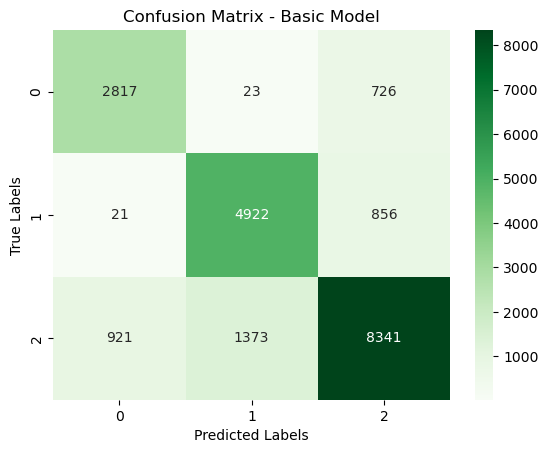

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3566
           1       0.78      0.85      0.81      5799
           2       0.84      0.78      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.80      0.80     20000



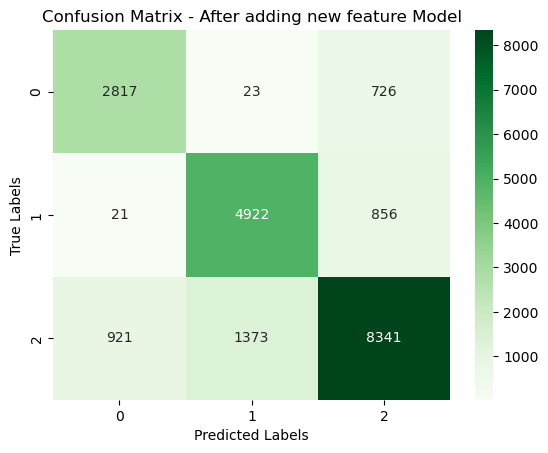

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3566
           1       0.80      0.86      0.83      5799
           2       0.86      0.82      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



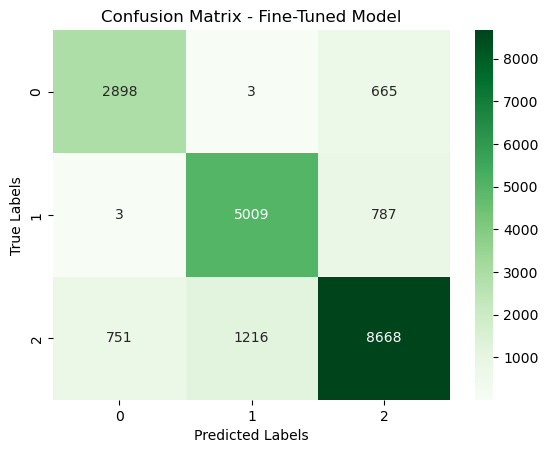

None


In [85]:
# KNN
basic_summary = model_evaluation(y_test_knn, y_pred_knn_basic, "Basic Model")
balanced_summary = model_evaluation(y_test_knn, y_pred_knn_transformed, "After adding new feature Model")
tuned_summary = model_evaluation(y_test_knn, y_pred_knn_tuned, "Fine-Tuned Model")

basic_summary
balanced_summary
tuned_summary

—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.45      0.84      0.58      3566
           1       0.63      0.72      0.67      5799
           2       0.84      0.52      0.64     10635

    accuracy                           0.64     20000
   macro avg       0.64      0.69      0.63     20000
weighted avg       0.71      0.64      0.64     20000



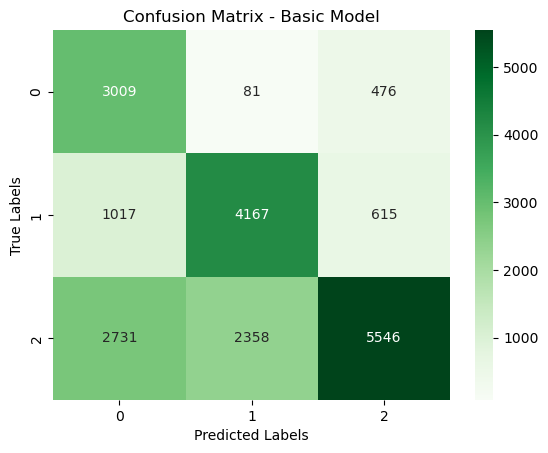

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.44      0.84      0.58      3566
           1       0.63      0.72      0.67      5799
           2       0.83      0.52      0.64     10635

    accuracy                           0.63     20000
   macro avg       0.63      0.69      0.63     20000
weighted avg       0.70      0.63      0.64     20000



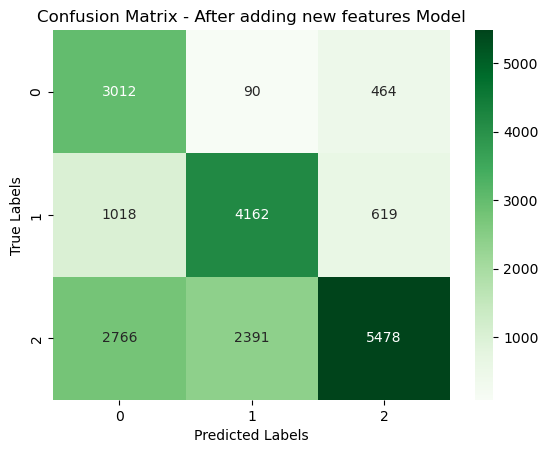

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.79      0.65      0.72      3566
           1       0.79      0.82      0.81      5799
           2       0.79      0.83      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.79      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000



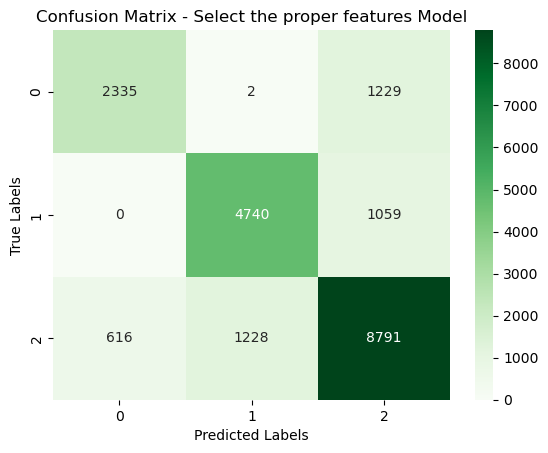

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3566
           1       0.78      0.86      0.82      5799
           2       0.85      0.78      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.82      0.81     20000
weighted avg       0.81      0.81      0.81     20000



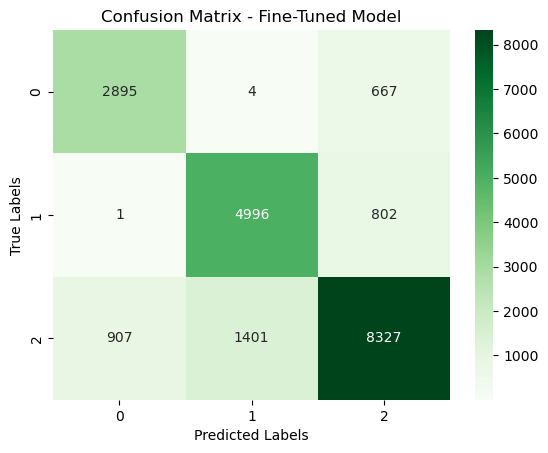

None


In [86]:
# Naive Bayes
basic_summary = model_evaluation(y_test_nb, y_pred_nb_basic, "Basic Model")
with_new_feature_summary = model_evaluation(y_test_nb, y_pred_nb_transformed1, "After adding new features Model")
balanced_summary = model_evaluation(y_test_nb, y_pred_nb_transformed, "Select the proper features Model")
tuned_summary = model_evaluation(y_test_nb, y_pred_nb_tuned, "Fine-Tuned Model")

basic_summary
with_new_feature_summary
balanced_summary
tuned_summary

—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3566
           1       0.81      0.86      0.83      5799
           2       0.85      0.83      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



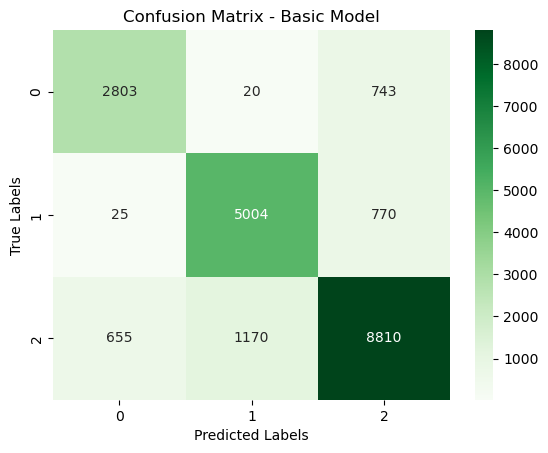

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3566
           1       0.81      0.87      0.84      5799
           2       0.86      0.83      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.83     20000
weighted avg       0.84      0.83      0.83     20000



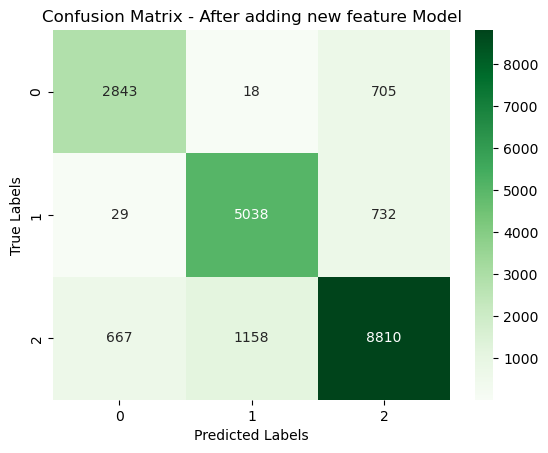

None
—— Evaluation Report ——
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3566
           1       0.81      0.87      0.84      5799
           2       0.86      0.83      0.84     10635

    accuracy                           0.84     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.84      0.84     20000



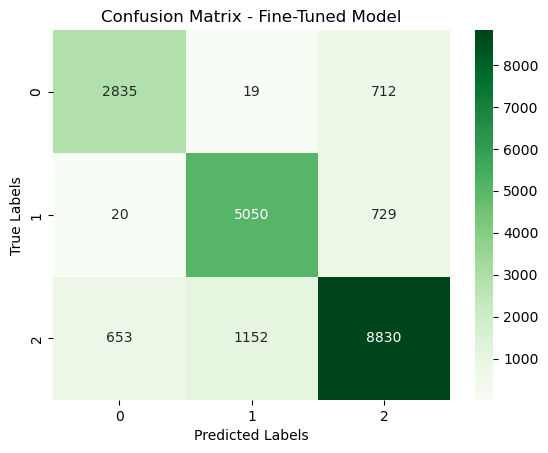

None


In [87]:
# Random Forest
basic_summary = model_evaluation(y_test_rf, y_pred_rf_basic, "Basic Model")
transformed_summary = model_evaluation(y_test_rf, y_pred_rf_transformed, "After adding new feature Model")
tuned_summary = model_evaluation(y_test_rf, y_pred_rf_tuned, "Fine-Tuned Model")

basic_summary
balanced_summary
tuned_summary

# Conclusion

### The Random Forest model demonstrated superior performance across various aspects. After fine-tuning, while there was an 8-unit decrease in accuracy for Class 0 predictions, there was an increase in accuracy for Class 1 and Class 2 predictions. Ultimately, the model correctly predicted 16,715 out of 20,000 instances but made errors in 3,285 cases. Despite the slight drop in accuracy for Class 0 after fine-tuning, the overall accuracy still favors the Random Forest model. If more precise hyperparameter tuning is feasible, it appears that further improvement in accuracy could be achieved. 
### We attempted to adjust various hyperparameters; however, due to excessively long runtime for the code block (even after running for 4-5 hours without obtaining results), we limited the grid search to only n_estimators and min_samples_split.

# Appendix :
### Please refrain from executing the code blocks in the appendix. This section reveals skipped parts of the solution process, and the output of code is influenced by the order of execution. Therefore, please only review the results that have already been executed.

## Filling the missing values

### Occupation

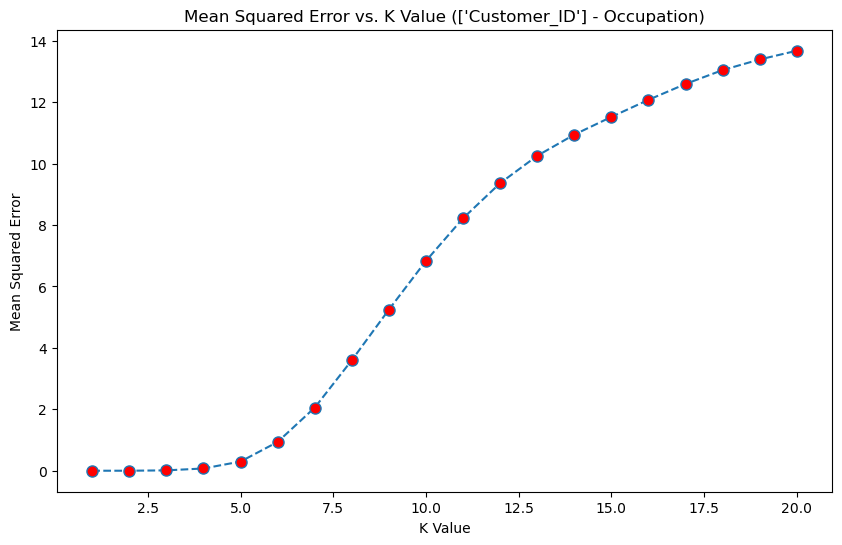

In [53]:
df_without_ms = df.dropna(subset = "Occupation")

k_mse_graph (df_without_ms, ["Customer_ID"], "Occupation", 10, 20)

In [54]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Occupation", 10, 3)

Mean Squared Error: 0.0115
R-squared: 0.9993760864450871
score: 0.9993760864450871


### Annual_Income

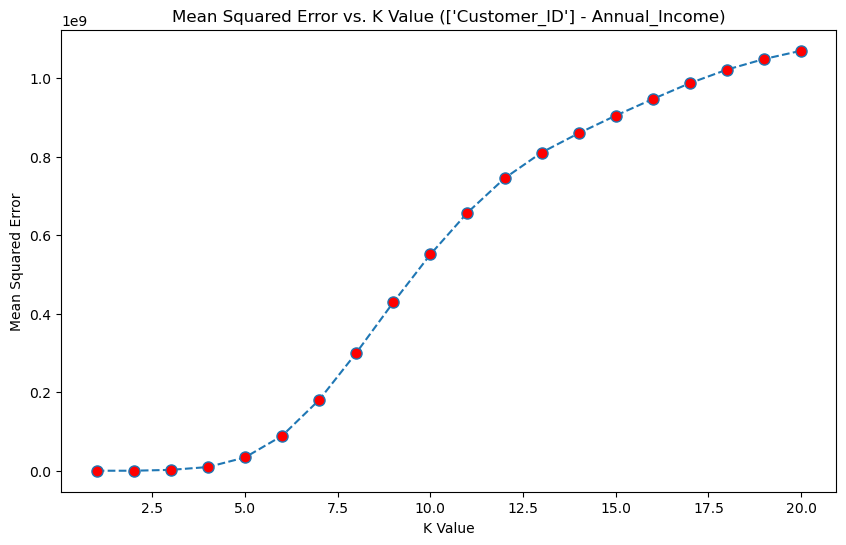

In [55]:
# method 2
df_without_ms = df.dropna(subset = "Annual_Income")

k_mse_graph (df_without_ms, ["Customer_ID"], "Annual_Income", 10, 20)

In [56]:
# k=1 can cause overfititng. But I chose 1 in order to get the lowest MSE result.
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Annual_Income", 10, 1)

Mean Squared Error: 0.0
R-squared: 1.0
score: 1.0


### Monthly_Inhand_Salary

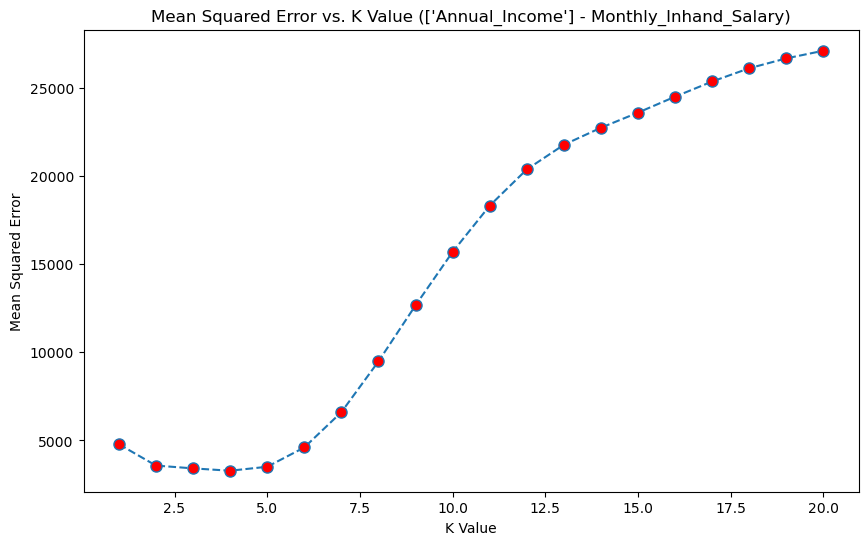

In [57]:
# There must not be missing values running model
df_without_ms = df.dropna(subset = "Monthly_Inhand_Salary")

k_mse_graph (df_without_ms, ["Annual_Income"], "Monthly_Inhand_Salary", 10, 20)

In [58]:
knn_regression_accuracy(df_without_ms, ["Annual_Income"], "Monthly_Inhand_Salary", 10, 3)

Mean Squared Error: 3411.0909403482424
R-squared: 0.9996611995706418
score: 0.9996611995706418


### Num_Bank_Accounts

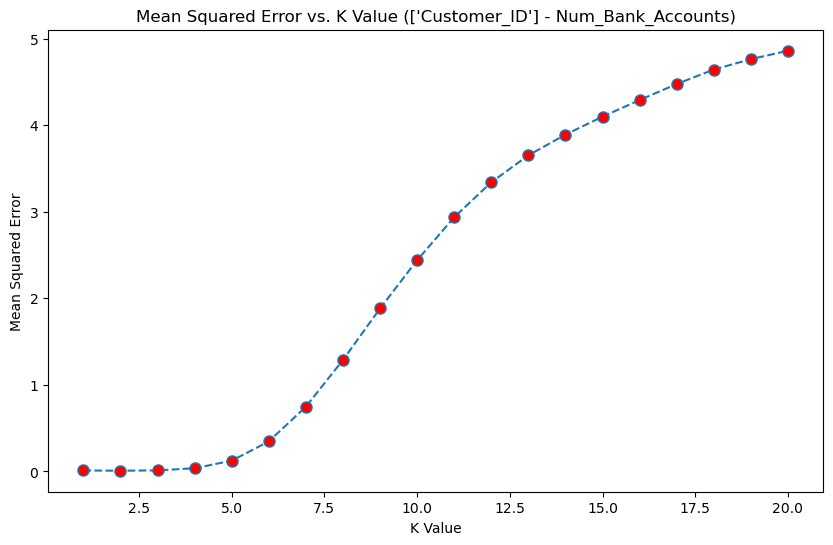

In [59]:
df_without_ms = df.dropna(subset = "Num_Bank_Accounts")

k_mse_graph (df_without_ms, ["Customer_ID"], "Num_Bank_Accounts", 10, 20)

In [60]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Num_Bank_Accounts", 10, 3)

Mean Squared Error: 0.012168518518518518
R-squared: 0.9981630419255303
score: 0.9981630419255303


### Num_Credit_Card

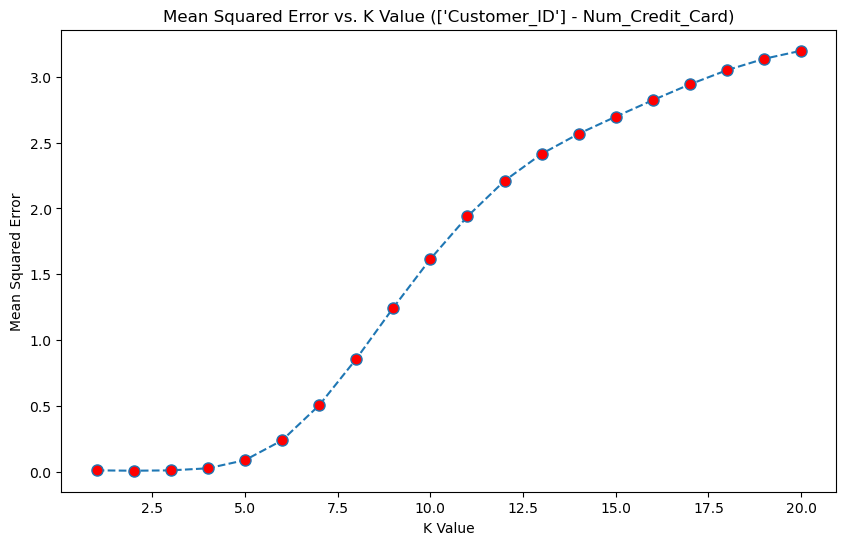

In [61]:
df_without_ms = df.dropna(subset = "Num_Credit_Card")

k_mse_graph (df_without_ms, ["Customer_ID"], "Num_Credit_Card", 10, 20)

In [62]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Num_Credit_Card", 10, 3)

Mean Squared Error: 0.01085740740740741
R-squared: 0.997473423485757
score: 0.997473423485757


### Interest_Rate

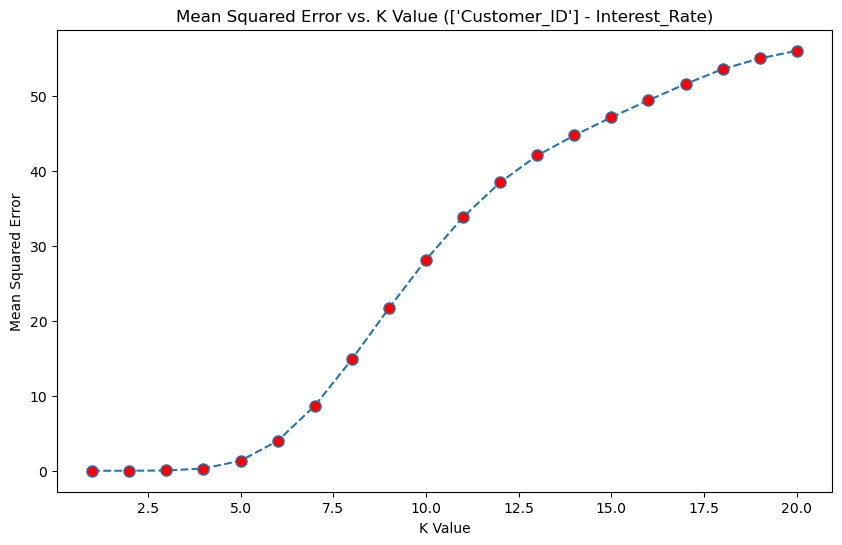

In [63]:
df_without_ms = df.dropna(subset = "Interest_Rate")

k_mse_graph (df_without_ms, ["Customer_ID"], "Interest_Rate", 10, 20)

In [64]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Interest_Rate", 10, 3)

Mean Squared Error: 0.0311
R-squared: 0.9995867157191627
score: 0.9995867157191627


### Num_of_Loan

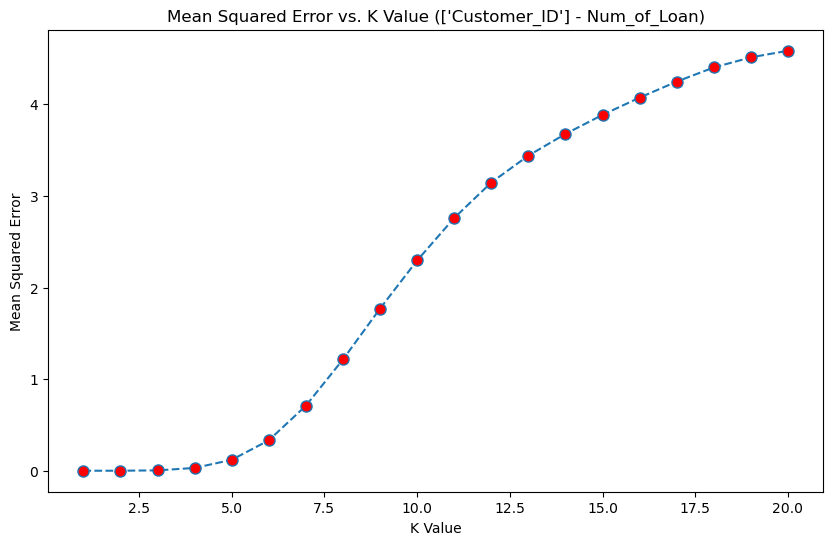

In [65]:
df_without_ms = df.dropna(subset = "Num_of_Loan")

k_mse_graph (df_without_ms, ["Customer_ID"], "Num_of_Loan", 10, 20)

In [66]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Num_of_Loan", 10, 3)

Mean Squared Error: 0.003866666666666667
R-squared: 0.9993582130498444
score: 0.9993582130498444


### Num_of_Delayed_Payment 

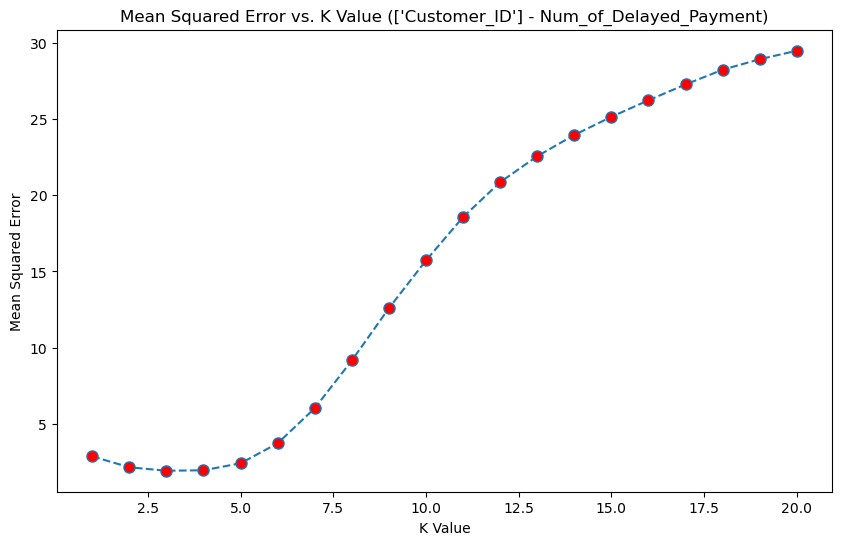

In [67]:
df_without_ms = df.dropna(subset = "Num_of_Delayed_Payment")

k_mse_graph (df_without_ms, ["Customer_ID"], "Num_of_Delayed_Payment", 10, 20)

In [68]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Num_of_Delayed_Payment", 10, 3)

Mean Squared Error: 1.9238148148148146
R-squared: 0.9516705671995496
score: 0.9516705671995496


### Delay_from_due_date 

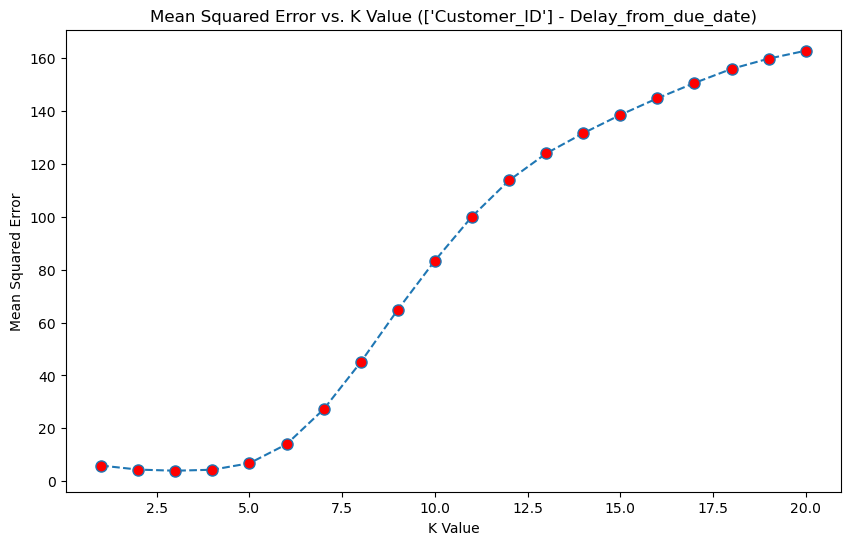

In [69]:
df_without_ms = df.dropna(subset = "Delay_from_due_date")

k_mse_graph (df_without_ms, ["Customer_ID"], "Delay_from_due_date", 10, 20)

In [70]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Delay_from_due_date", 10, 3)

Mean Squared Error: 3.97207962962963
R-squared: 0.9819892790427398
score: 0.9819892790427398


### Credit_History_Month (initially Age)

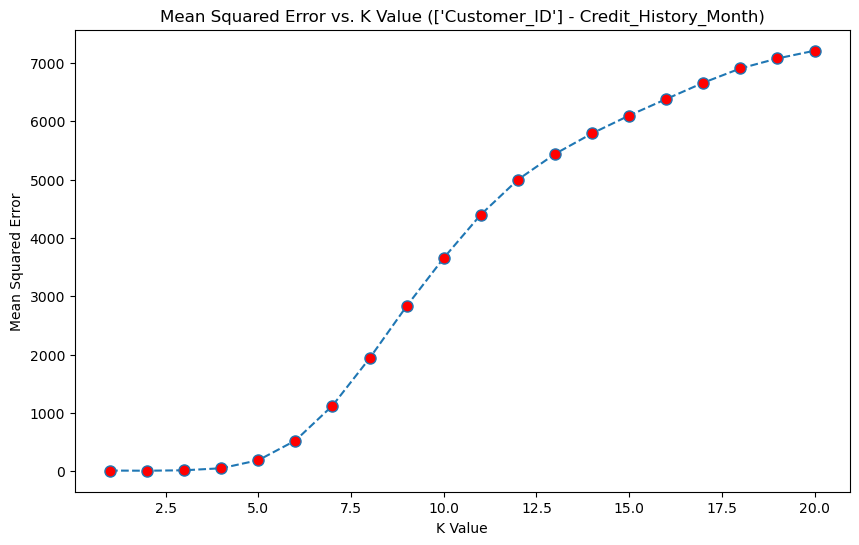

In [71]:
df_without_ms = df.dropna(subset = "Credit_History_Month")

k_mse_graph (df_without_ms, ["Customer_ID"], "Credit_History_Month", 10, 20)

In [72]:
# error range 7~8 can be accepted in my opinion
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Credit_History_Month", 10, 3)

Mean Squared Error: 15.963006172839506
R-squared: 0.9983961721105681
score: 0.9983961721105681


### Num_Credit_Inquiries 

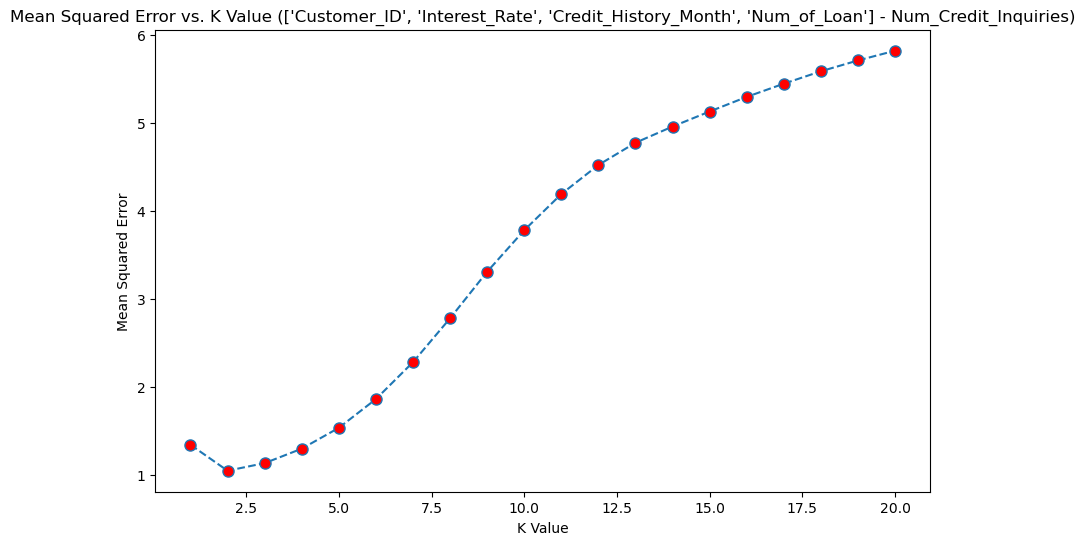

In [73]:
df_without_ms = df.dropna(subset = "Num_Credit_Inquiries")

k_mse_graph (df_without_ms, ["Customer_ID","Interest_Rate","Credit_History_Month","Num_of_Loan"], "Num_Credit_Inquiries", 10, 20)

In [74]:
knn_regression_accuracy(df_without_ms, ["Customer_ID","Interest_Rate","Credit_History_Month", "Num_of_Loan"], "Num_Credit_Inquiries", 10, 3)

Mean Squared Error: 1.135479012345679
R-squared: 0.9233346610636892
score: 0.9233346610636892


### Credit_Mix

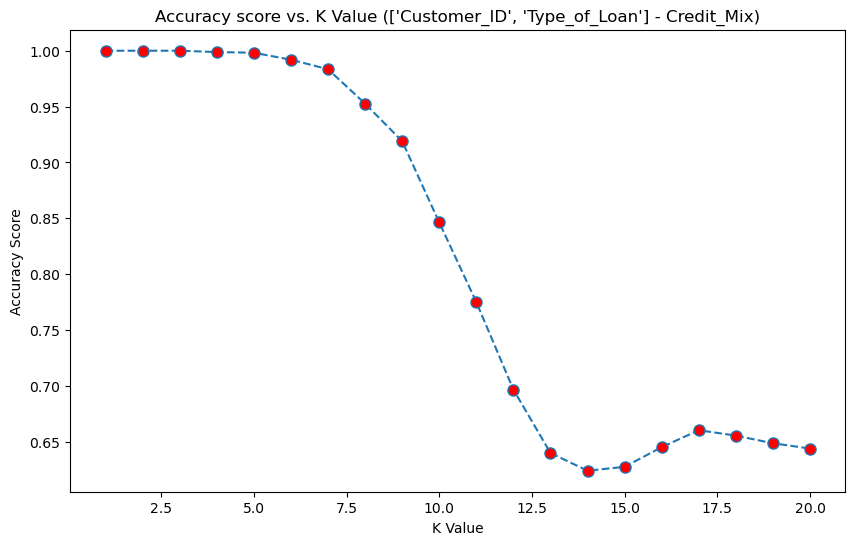

In [75]:
# categorical :classifier model is needed
df_without_ms = df.dropna(subset = "Credit_Mix")
k_score_graph (df_without_ms, ["Customer_ID", "Type_of_Loan"], "Credit_Mix", 10, 20)

In [76]:
knn_classification_accuracy(df_without_ms, ["Customer_ID", "Type_of_Loan"], "Credit_Mix", 10, 3)

accuracy:  1.0
Confusion Matrix: 
 [[4736    0    0]
 [   0 9225    0]
 [   0    0 6039]]


### Changed_Credit_Limit

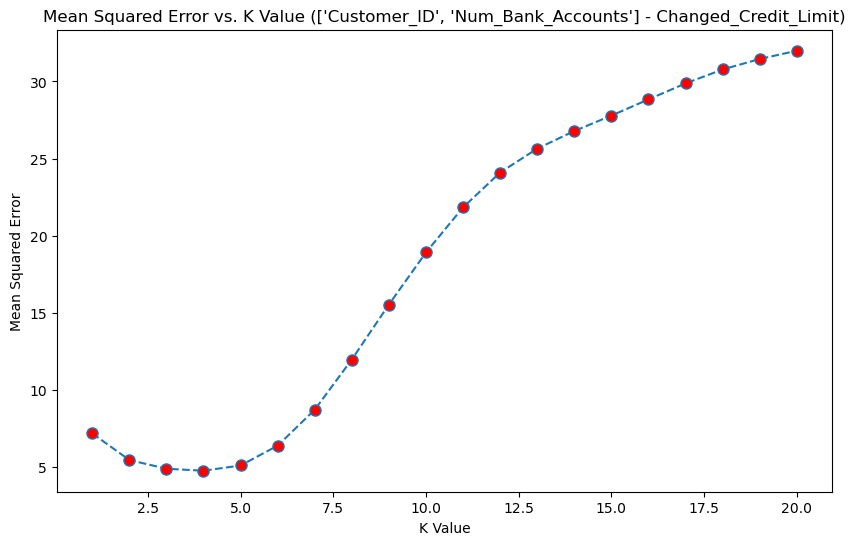

In [77]:
df_without_ms = df.dropna(subset = "Changed_Credit_Limit")

k_mse_graph (df_without_ms, ["Customer_ID","Num_Bank_Accounts"], "Changed_Credit_Limit", 10, 20)

In [78]:
knn_regression_accuracy(df_without_ms, ["Customer_ID", "Num_Bank_Accounts"], "Changed_Credit_Limit", 10, 3)

Mean Squared Error: 4.904998546975309
R-squared: 0.893059564626737
score: 0.893059564626737


### Total_EMI_per_month

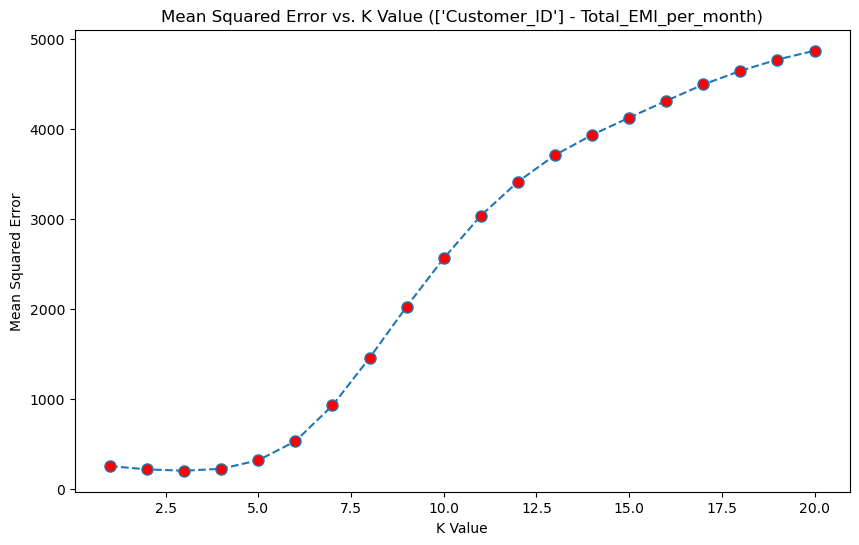

In [79]:
df_without_ms = df.dropna(subset = "Total_EMI_per_month")

k_mse_graph (df_without_ms, ["Customer_ID"], "Total_EMI_per_month", 10, 20)

In [80]:
knn_regression_accuracy(df_without_ms, ["Customer_ID"], "Total_EMI_per_month", 10, 3)

Mean Squared Error: 206.7760323805485
R-squared: 0.9696011463045137
score: 0.9696011463045137
